# Regularization and sparsity <h3 style="color:green">Bayesian (JAGS) version</h3>

### Penalization as a prior feature

## _Josep Fortiana_ &emsp;&emsp;&emsp;&emsp;&emsp; 2023-04-24

***
###### LaTeX macros
$\def\prob{P}$
$\def\argmax{\operatorname{arg\,max}}$
$\def\argmin{\operatorname{arg\,min}}$
$\def\borel{\operatorname{Borel}}$
$\def\cE{\cal E}$
$\def\cP{\cal P}$
$\def\R{\mathbb{R}}$ 
$\def\N{\mathbb{N}}$
$\def\Z{\mathbb{Z}}$
$\def\Ee{\operatorname{E}}$
$\def\va{\text{v.a.}}$
$\def\var{\operatorname{var}}$
$\def\Var{\operatorname{Var}}$
$\def\cov{\operatorname{cov}}$
$\def\cor{\operatorname{cor}}$
$\def\binomdist{\operatorname{Binom}}$
$\def\berndist{\operatorname{Ber}}$
$\def\betabinomdist{\operatorname{Beta-Binom}}$
$\def\betadist{\operatorname{Beta}}$
$\def\cauchydist{\operatorname{Cauchy}}$
$\def\expdist{\operatorname{Exp}}$
$\def\fdist{\operatorname{F}}$
$\def\gammadist{\operatorname{Gamma}}$
$\def\hyperdist{\operatorname{Hypergeom}}$
$\def\hypergeomdist{\operatorname{Hypergeom}}$
$\DeclareMathOperator{\invgammadist}{IG}$
$\DeclareMathOperator{\multinomialdist}{Multinomial}$
$\DeclareMathOperator{\multinomdist}{Multinom}$
$\def\poissondist{\operatorname{Poisson}}$
$\def\geomdist{\operatorname{Geom}}$
$\def\normaldist{\operatorname{N}}$
$\def\unifdist{\operatorname{Unif}}$
$\def\xbar{\kern1.3pt\overline{\kern-1.3pt x}}$
$\DeclareMathOperator{\indica}{\mathbb{1}}$
$\def\CondTo{\mathbin{|\mskip0.5mu}}$
$\def\eqdef{\stackrel{\text{def}}{\mskip3mu=\mskip3mu}}$
***

# `Hitters` dataset in the `ISLR2` package

In [1]:
#install.packages("ISLR2",dependencies=TRUE,repos="https://cloud.r-project.org")
require(ISLR2)

Loading required package: ISLR2



### Baseball _Hitters_ Data

#### Description: Prediction of annual salary as a function of performance.

Major League Baseball Data from the 1986 and 1987 seasons 

#### Format

A data frame with 322 observations of major league players on the following 20 variables.

01. `AtBat`:     Number of times at bat in 1986,
02. `Hits`:      Number of hits in 1986,
03. `HmRun`:     Number of home runs in 1986,
04. `Runs`:      Number of runs in 1986,
05. `RBI`:       Number of runs batted in in 1986,
06. `Walks`:     Number of walks in 1986,
07. `Years`:     Number of years in the major leagues,
08. `CAtBat`:    Number of times at bat during his career,
09. `CHits`:     Number of hits during his career,
10. `CHmRun`:    Number of home runs during his career,
11. `CRuns`:     Number of runs during his career,
12. `CRBI`:      Number of runs batted in during his career,
13. `CWalks`:    Number of walks during his career,
14. `League`:    A factor with levels `A` and `N` indicating player's league at the end of 1986,
15. `Division`:  A factor with levels `E` and `W` indicating player's division at the end of 1986,
16. `PutOuts`:   Number of put outs in 1986,
17. `Assists`:   Number of assists in 1986,
18. `Errors`:    Number of errors in 1986,
19. `Salary`:    1987 annual salary on opening day in thousands of dollars,
20. `NewLeague`: A factor with levels `A` and `N` indicating player's league at the beginning of 1987.

#### Source

This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.   
This is part of the data that was used in the 1988 ASA Graphics Section Poster Session.   
The salary data were originally from Sports Illustrated, April 20, 1987.   
The 1986 and career statistics were obtained from The 1987 Baseball Encyclopedia Update published by Collier Books, Macmillan Publishing Company, New York.

In [2]:
data(Hitters)
str(Hitters)

'data.frame':	322 obs. of  20 variables:
 $ AtBat    : int  293 315 479 496 321 594 185 298 323 401 ...
 $ Hits     : int  66 81 130 141 87 169 37 73 81 92 ...
 $ HmRun    : int  1 7 18 20 10 4 1 0 6 17 ...
 $ Runs     : int  30 24 66 65 39 74 23 24 26 49 ...
 $ RBI      : int  29 38 72 78 42 51 8 24 32 66 ...
 $ Walks    : int  14 39 76 37 30 35 21 7 8 65 ...
 $ Years    : int  1 14 3 11 2 11 2 3 2 13 ...
 $ CAtBat   : int  293 3449 1624 5628 396 4408 214 509 341 5206 ...
 $ CHits    : int  66 835 457 1575 101 1133 42 108 86 1332 ...
 $ CHmRun   : int  1 69 63 225 12 19 1 0 6 253 ...
 $ CRuns    : int  30 321 224 828 48 501 30 41 32 784 ...
 $ CRBI     : int  29 414 266 838 46 336 9 37 34 890 ...
 $ CWalks   : int  14 375 263 354 33 194 24 12 8 866 ...
 $ League   : Factor w/ 2 levels "A","N": 1 2 1 2 2 1 2 1 2 1 ...
 $ Division : Factor w/ 2 levels "E","W": 1 2 2 1 1 2 1 2 2 1 ...
 $ PutOuts  : int  446 632 880 200 805 282 76 121 143 0 ...
 $ Assists  : int  33 43 82 11 40 421 127 28

Detect and remove `NA` values

In [3]:
dim(Hitters)
sum(is.na(Hitters$Salary))
Hitters=na.omit(Hitters)
dim(Hitters)
sum(is.na(Hitters))

[1] 322  20

[1] 59

[1] 263  20

[1] 0

In [4]:
# Prepare x, y for the glmnet syntax
# Convert factors to one-hot indicators
x<-model.matrix(Salary~.,Hitters)[,-1]
y<-Hitters$Salary

Tibshirani (1996) assumes predictor columns centered and standardized to unit variance.   
Actually the `glmnet()` function has a Boolean parameter `standardize` which does precisely this.   
Here we standardize "by hand"

In [5]:
xm<-apply(x,2,mean)
xc<-sweep(x,2,xm,"-")
round(max(abs(apply(xc,2,mean))),6) 
xs<-apply(xc,2,sd)
x0<-sweep(xc,2,xs,"/")
str(x0)

[1] 0

 num [1:263, 1:19] -0.602 0.512 0.627 -0.561 1.292 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:263] "-Alan Ashby" "-Alvin Davis" "-Andre Dawson" "-Andres Galarraga" ...
  ..$ : chr [1:19] "AtBat" "Hits" "HmRun" "Runs" ...


### (OLS) Ordinary Least Squares regression

In [6]:
Hitters.ols<-lm(Salary~.,data=Hitters)
summary(Hitters.ols)


Call:
lm(formula = Salary ~ ., data = Hitters)

Residuals:
    Min      1Q  Median      3Q     Max 
-907.62 -178.35  -31.11  139.09 1877.04 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  163.10359   90.77854   1.797 0.073622 .  
AtBat         -1.97987    0.63398  -3.123 0.002008 ** 
Hits           7.50077    2.37753   3.155 0.001808 ** 
HmRun          4.33088    6.20145   0.698 0.485616    
Runs          -2.37621    2.98076  -0.797 0.426122    
RBI           -1.04496    2.60088  -0.402 0.688204    
Walks          6.23129    1.82850   3.408 0.000766 ***
Years         -3.48905   12.41219  -0.281 0.778874    
CAtBat        -0.17134    0.13524  -1.267 0.206380    
CHits          0.13399    0.67455   0.199 0.842713    
CHmRun        -0.17286    1.61724  -0.107 0.914967    
CRuns          1.45430    0.75046   1.938 0.053795 .  
CRBI           0.80771    0.69262   1.166 0.244691    
CWalks        -0.81157    0.32808  -2.474 0.014057 *  
LeagueN       62.5

The $p$-values of several predictors are large, suggesting these have a low predictive power.

Possibly at least some of these predictors will be discarded after a selection procedure.

In general a large  $p$-value is not enough evidence to discard a predictor (multicollinearity is a property of _a subset_ of predictors)

In [7]:
#install.packages("corrplot",dependencies=TRUE,repos="https://cloud.r-project.org")
require(corrplot,quietly=TRUE)

corrplot 0.92 loaded



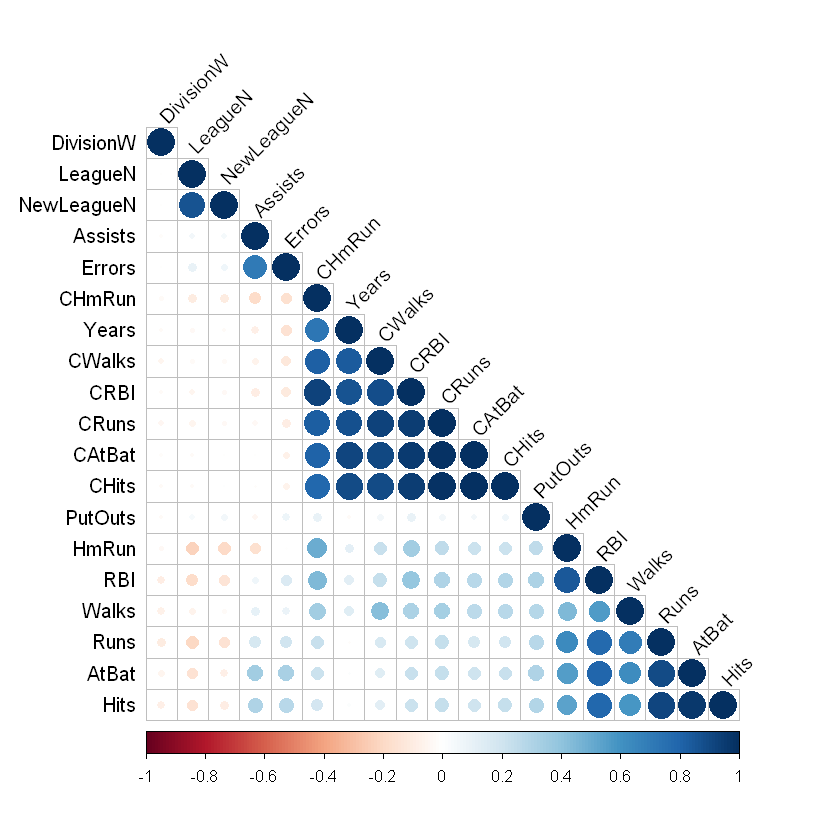

In [8]:
options(repr.plot.width=7,repr.plot.height=7)
corrplot(cor(x), type="lower", order="hclust", tl.col="black", tl.srt=45)

In [9]:
#install.packages("car",dependencies=TRUE,repos="https://cloud.r-project.org")
require(car)

Loading required package: car

Loading required package: carData



In [10]:
round(vif(Hitters.ols),1)

AtBat      Hits     HmRun      Runs       RBI     Walks     Years    CAtBat 
     22.9      30.3       7.8      15.2      11.9       4.1       9.3     251.6 
    CHits    CHmRun     CRuns      CRBI    CWalks    League  Division   PutOuts 
    503.0      46.5     162.5     132.0      19.7       4.1       1.1       1.2 
  Assists    Errors NewLeague 
      2.7       2.2       4.1

Large VIF values indicate multicollinearity.

Condition number $\kappa$ for the model matrix $x$ and the standardized model matrix $x0$.

In [11]:
round(kappa(x),1)
round(kappa(x0),1)

[1] 31956.9

[1] 65.5

Adding the intercept column of ones (it should be counted in the regression condition number)

In [12]:
n<-nrow(x)
p<-ncol(x)
x1<-cbind(rep(1,n),x)
x01<-cbind(rep(1,n),x0)
round(kappa(x1),1)
round(kappa(x01),1)

[1] 26973.7

[1] 65.2

$\kappa$ improves with standardization, but VIF values cannot be modified (correlation is invariant under centering and scaling)

# Bayesian Ridge with JAGS

In [13]:
#install.packages("rjags",dependencies=TRUE,repos= "https://cloud.r-project.org")
require(rjags,quietly=TRUE)

Linked to JAGS 4.3.1

Loaded modules: basemod,bugs



In [14]:
#install.packages("bayesplot",dependencies=TRUE,repos= "https://cloud.r-project.org")
require(bayesplot,quietly=TRUE)

This is bayesplot version 1.10.0

- Online documentation and vignettes at mc-stan.org/bayesplot

- bayesplot theme set to bayesplot::theme_default()

   * Does _not_ affect other ggplot2 plots

   * See ?bayesplot_theme_set for details on theme setting



## 00 - Gaussian prior for the regression coefficients. 
### Gamma prior for the precision.

### Model:

$\beta_{0}$ is the intercept, $\beta=(\beta_{1},\dots,\beta_{p})$ is the vector of regression coefficients, $\tau=1/\sigma^{2}$ is the precision parameter.

$$
    \begin{array}{lcl}
        y_{i}     &\sim    &\normaldist(\mu_{i},\sigma^{2}),\mskip45mu 1\leq i\leq n,\\[0.2cm]
        \tau      &=       &1/\sigma^{2},\\[0.2cm]
        \mu_{i}   &=       &\beta_{0}+\sum_{j=1}^{p}x_{ij}\cdot \beta_{j}
                    =\beta_{0}+x_{i\,\cdot\,}\cdot \beta,\mskip45mu 1\leq i\leq n,\\[0.2cm]
        \beta_{0} &\sim    &\normaldist(0,1.0E01),\\[0.2cm]
        \beta_{j} &\sim    &\normaldist(0,1.0E02),\mskip45mu 1\leq j\leq p,\\[0.2cm]
        \tau      &\sim    &\gammadist(0.01,0.01).
    \end{array}
$$

In [15]:
Hitters.model.String.00  <-  "model{
# Likelihood
    for(i in 1:n){
        y[i] ~ dnorm(mu[i], tau)
        mu[i] <- beta0 + inprod(x[i,],beta[]) 
        }
# A gaussian prior with a small precision for the intercept beta0 and the vector beta of regression coefficients
    beta0 ~ dnorm(0, 0.01)
    for(j in 1:p){
        beta[j] ~ dnorm(0,0.0001)
        }

# Prior for the precision parameter
    sigma <- 1.0/sqrt(tau)
    tau ~ dgamma(0.01, 0.01)
}" 

In [16]:
Hitters.data.list.00<-list(y = y, n = n, p = p, x = x0)

## Compile the model in JAGS

In [17]:
Hitters.model.00<-jags.model(textConnection(Hitters.model.String.00),data=Hitters.data.list.00)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 263
   Unobserved stochastic nodes: 21
   Total graph size: 6079

Initializing model



In [18]:
update(Hitters.model.00, n.iter=2000, progress.bar = "text")

In [19]:
Hitters.sample.00<-coda.samples(Hitters.model.00, variable.names = c("beta0", "beta", "sigma"), 
                 n.iter = 20000, progress.bar = "text" ) 

In [20]:
summary(Hitters.sample.00)


Iterations = 2001:22000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 20000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

            Mean    SD Naive SE Time-series SE
beta[1]  -36.646 76.12  0.53828        1.37463
beta[2]   75.867 74.02  0.52342        1.31554
beta[3]   -8.653 57.41  0.40594        0.80445
beta[4]   30.397 69.73  0.49304        1.12063
beta[5]   20.232 67.88  0.47996        1.07568
beta[6]   54.401 50.33  0.35588        0.66488
beta[7]  -23.272 65.83  0.46546        1.01593
beta[8]   14.943 86.76  0.61352        1.78055
beta[9]   62.395 84.84  0.59992        1.66399
beta[10]  47.082 67.62  0.47818        1.19711
beta[11]  67.081 86.25  0.60987        1.70954
beta[12]  68.000 84.59  0.59813        1.78736
beta[13] -29.217 73.10  0.51692        1.22166
beta[14]  21.796 54.38  0.38452        0.75254
beta[15] -58.570 35.25  0.24923        0.25520
beta[16]  68.963 37.52  0.26533        0.30503
be

In [21]:
#options(repr.plot.width=12,repr.plot.height=15)
#plot(Hitters.sample.00) 

In [22]:
color_scheme_set("brightblue")

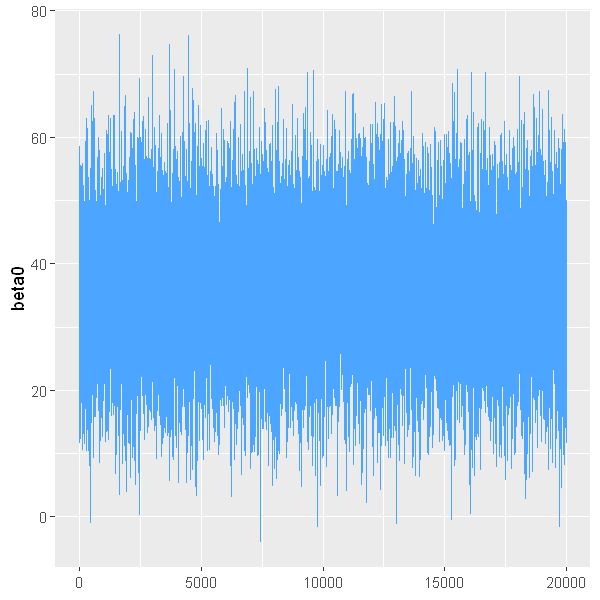

In [23]:
options(repr.plot.width=5,repr.plot.height=5)
mcmc_trace(Hitters.sample.00, pars=vars("beta0"))

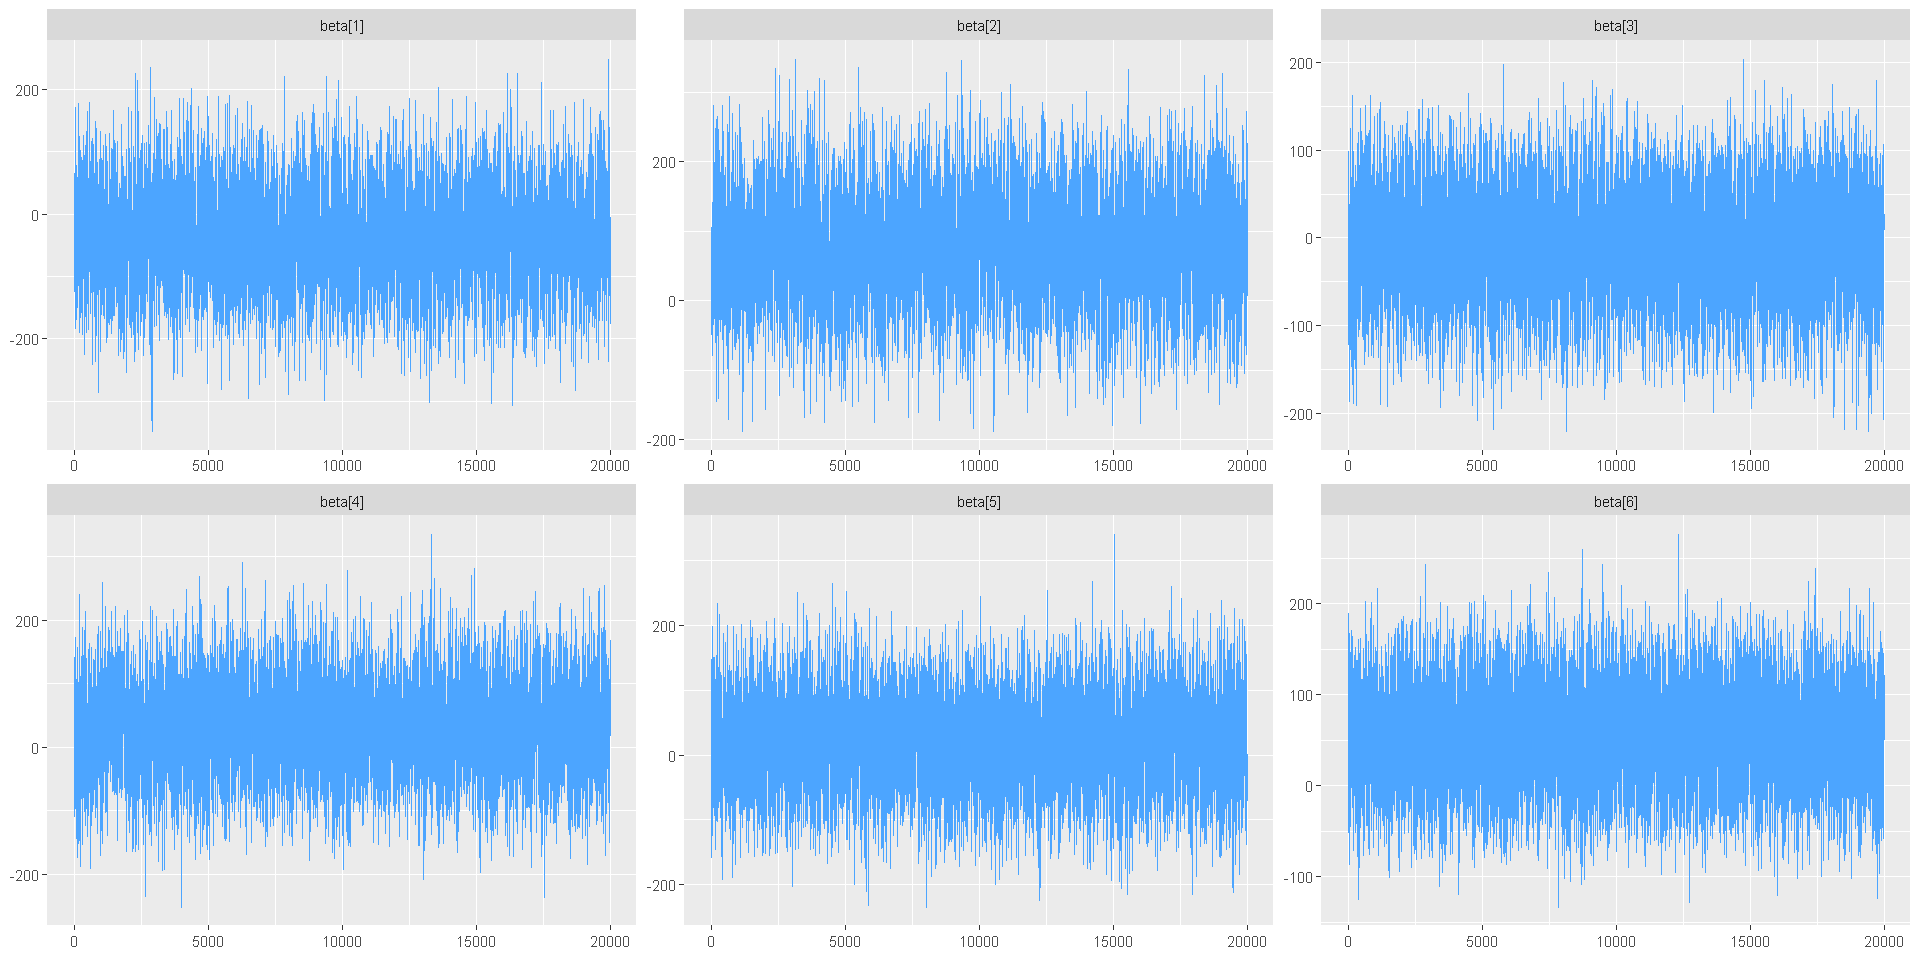

In [24]:
options(repr.plot.width=16,repr.plot.height=8)
mcmc_trace(Hitters.sample.00, pars=vars(param_range("beta", 1:6)))

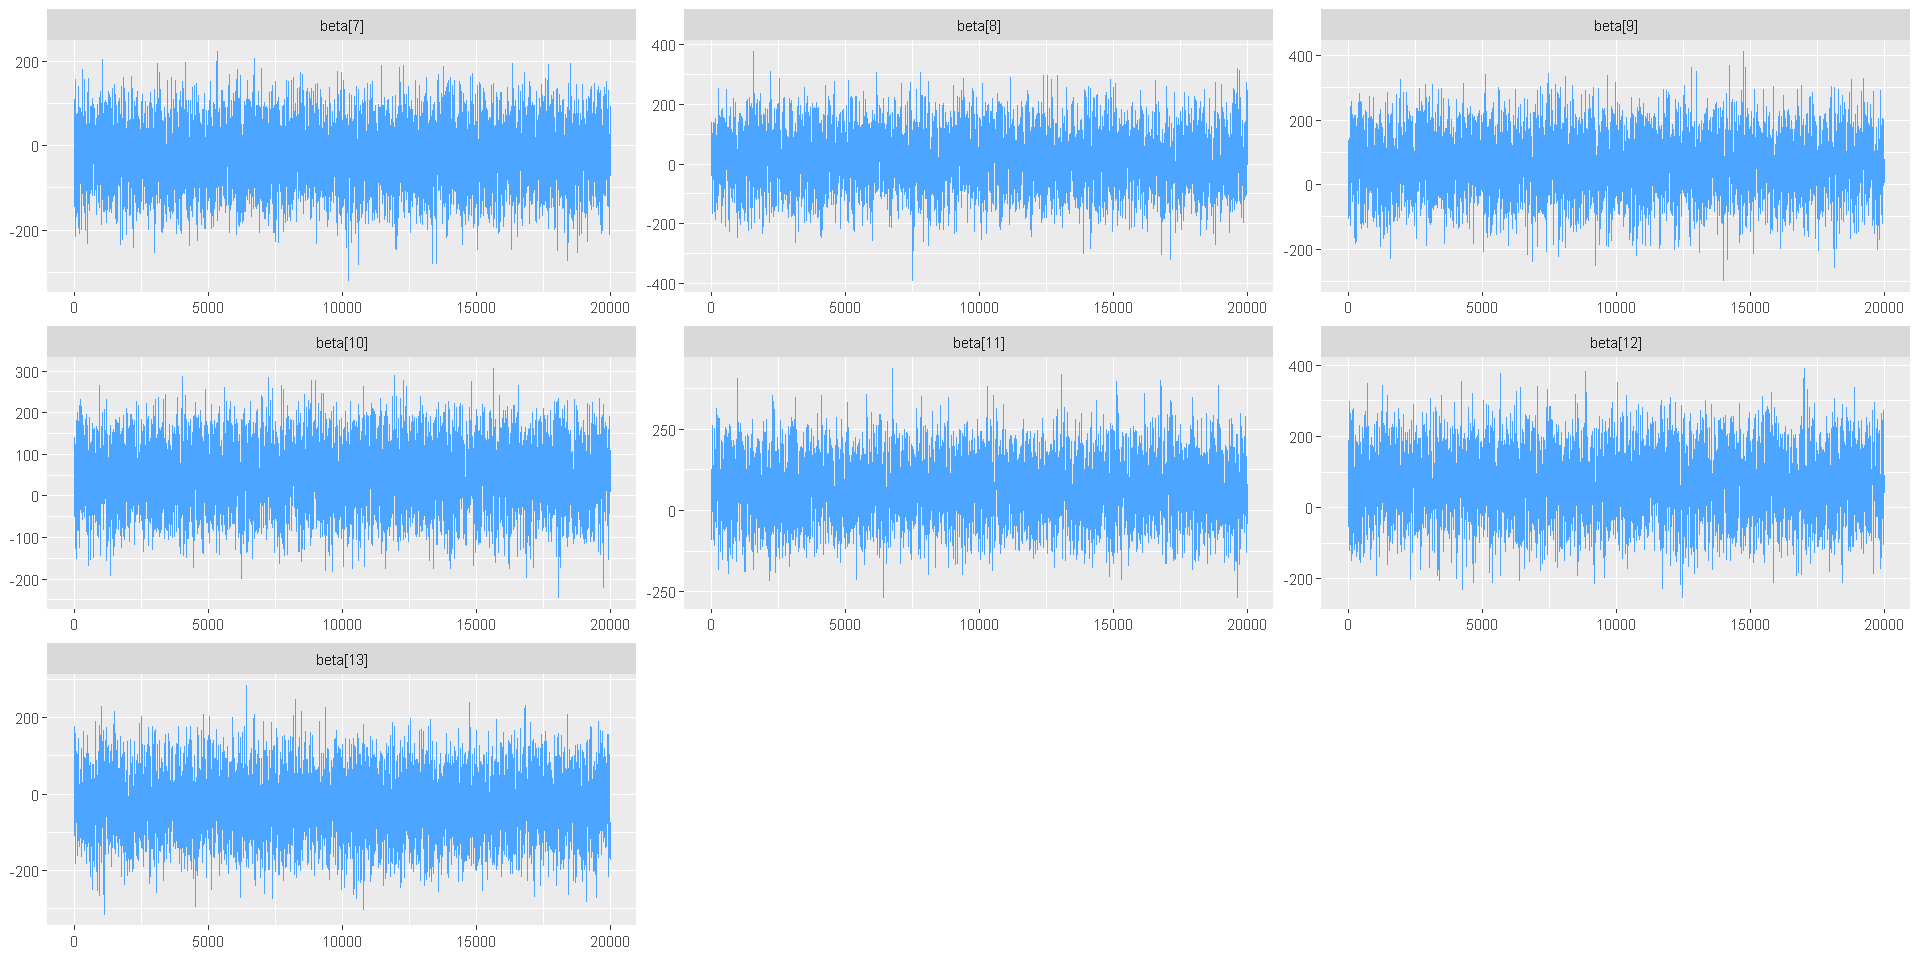

In [25]:
options(repr.plot.width=16,repr.plot.height=8)
mcmc_trace(Hitters.sample.00, pars=vars(param_range("beta", 7:13)))

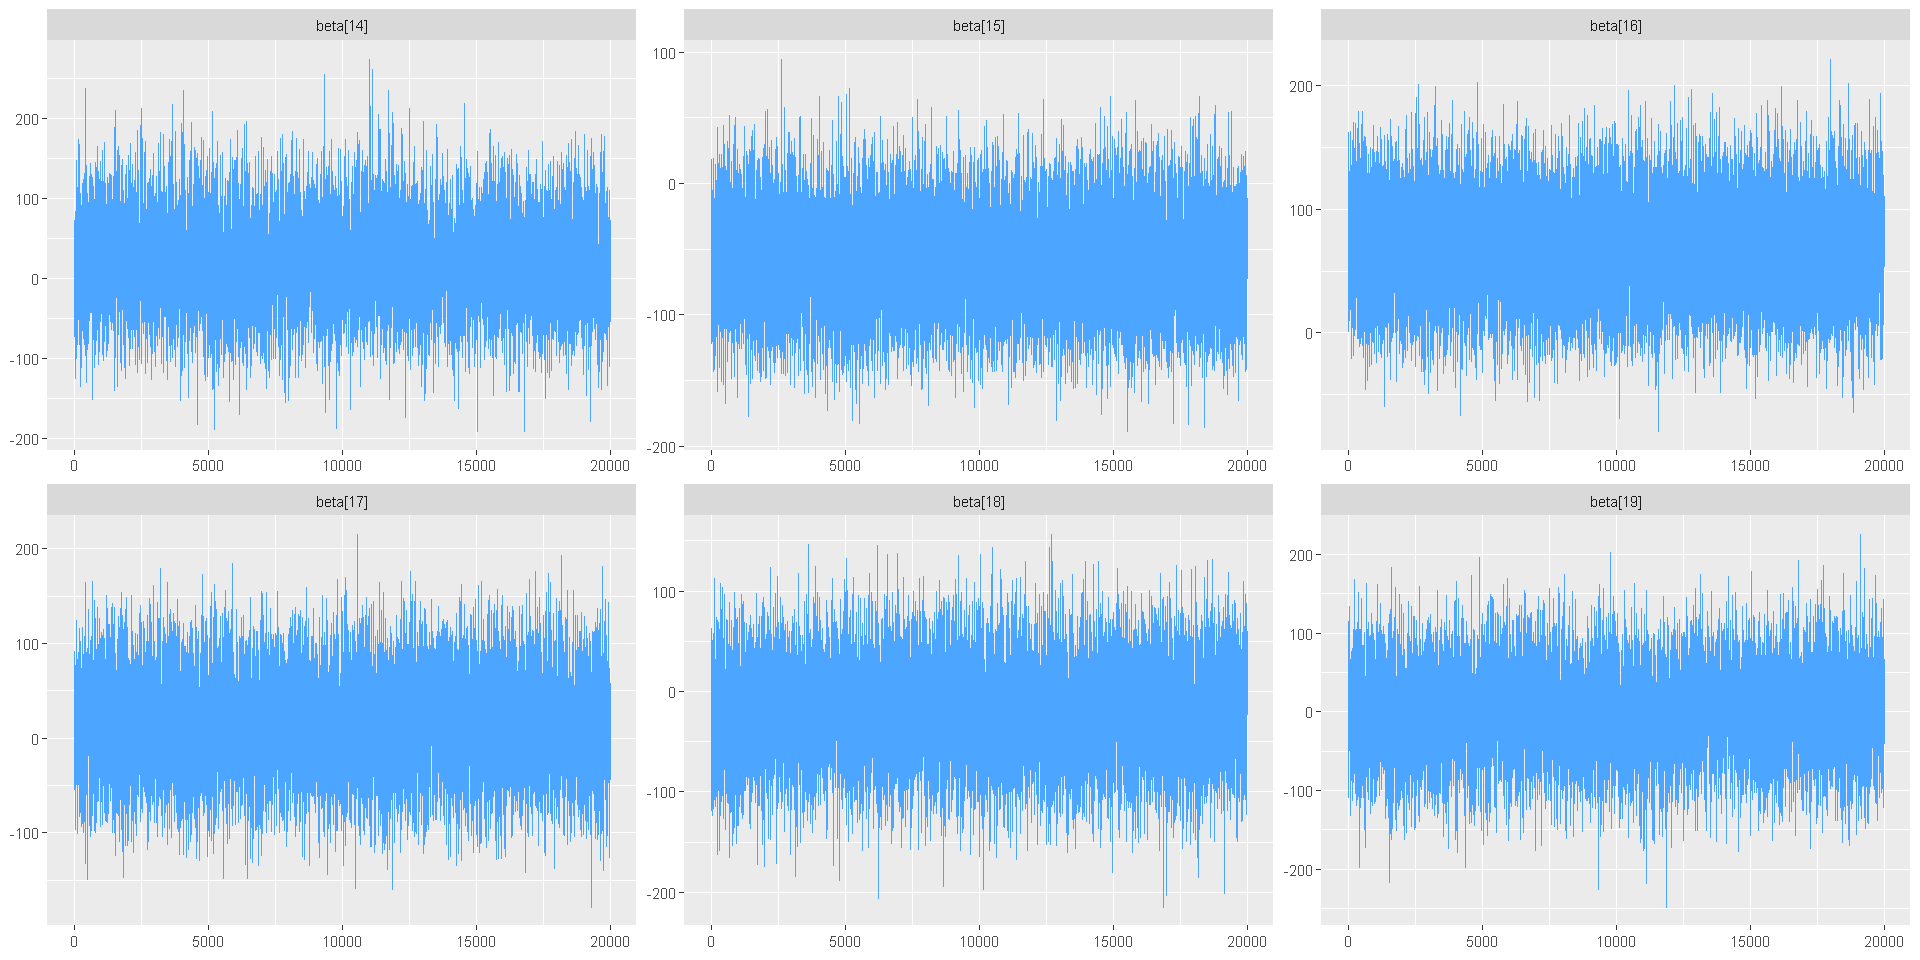

In [26]:
options(repr.plot.width=16,repr.plot.height=8)
mcmc_trace(Hitters.sample.00, pars=vars(param_range("beta", 14:19)))

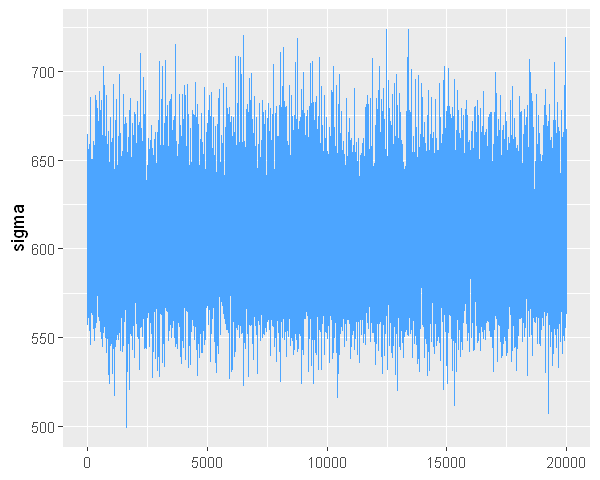

In [27]:
options(repr.plot.width=5,repr.plot.height=4)
mcmc_trace(Hitters.sample.00,pars=vars("sigma"))

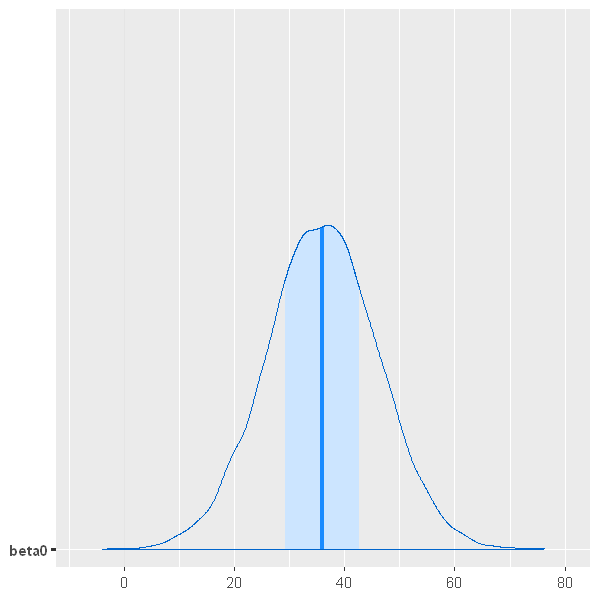

In [28]:
options(repr.plot.width=5,repr.plot.height=5)
mcmc_areas(Hitters.sample.00, pars=vars("beta0"))

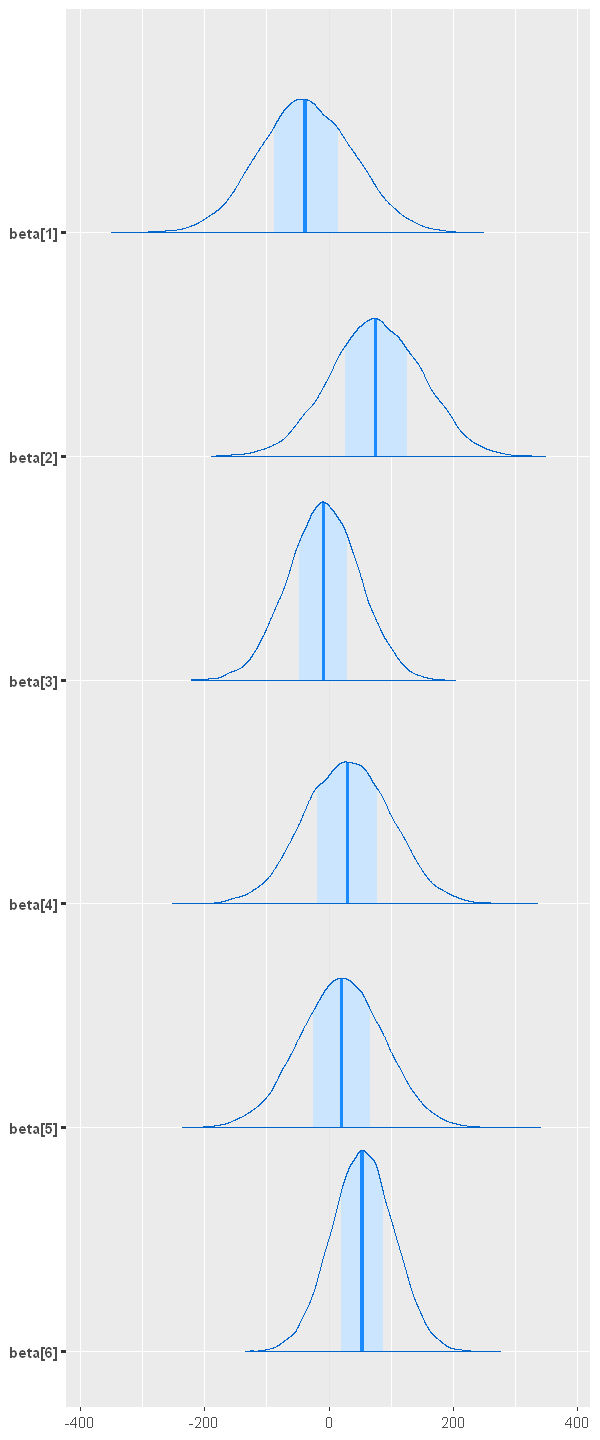

In [29]:
options(repr.plot.width=5,repr.plot.height=12)
mcmc_areas(Hitters.sample.00, pars=vars(param_range("beta", 1:6)))

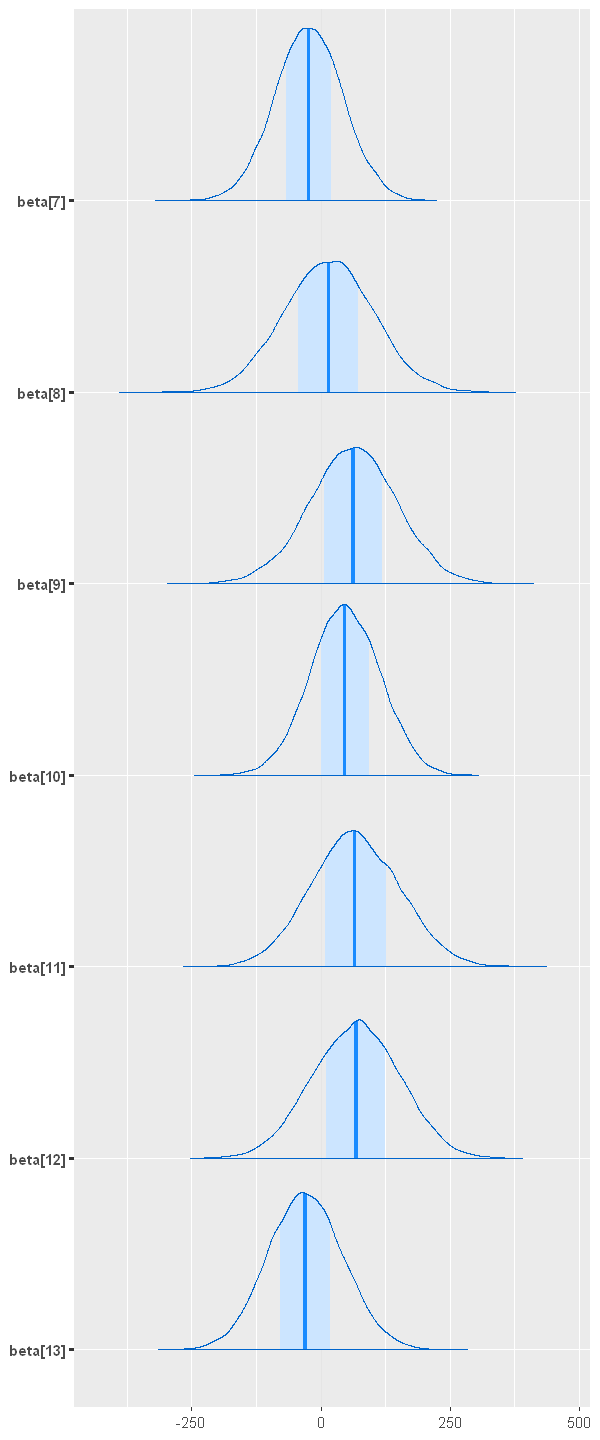

In [30]:
options(repr.plot.width=5,repr.plot.height=12)
mcmc_areas(Hitters.sample.00, pars=vars(param_range("beta", 7:13)))

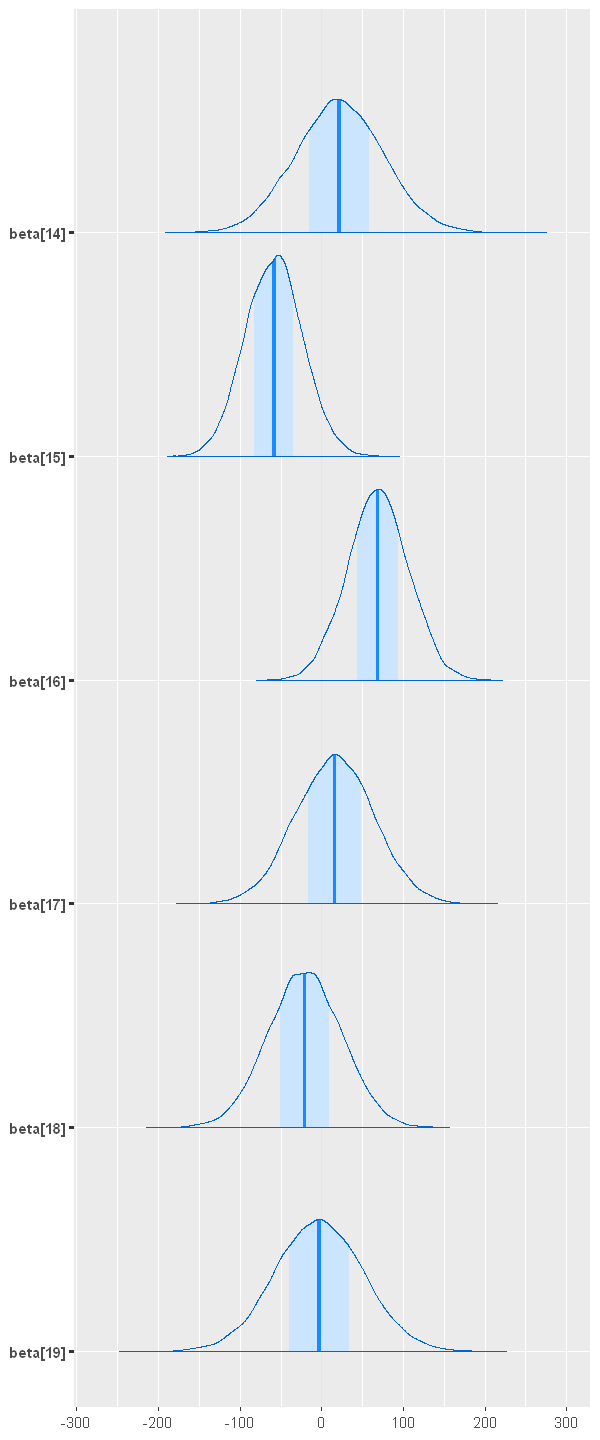

In [31]:
options(repr.plot.width=5,repr.plot.height=12)
mcmc_areas(Hitters.sample.00, pars=vars(param_range("beta", 14:19)))

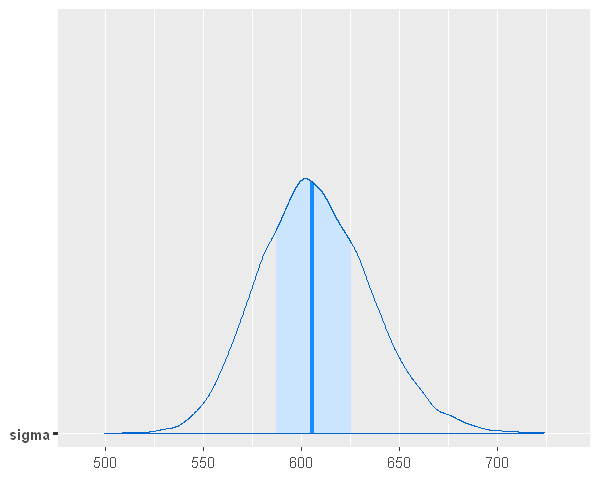

In [32]:
options(repr.plot.width=5,repr.plot.height=4)
mcmc_areas(Hitters.sample.00, pars=vars("sigma"))

## 01 - Gaussian prior for the regression coefficients. 
### A common gamma prior for the regression coefficients' precision parameter.
### Gamma prior for the regression precision parameter

### Model:

$\beta_{0}$ is the intercept, $\beta=(\beta_{1},\dots,\beta_{p})$ is the vector of regression coefficients,   
$\tau_{y}=1/\sigma_{y}^{2}$ is the regression response precision parameter,   
$\tau_{\beta}=1/\sigma_{\beta}^{2}$ is the common precision parameter for the regression coefficients.

$$
    \begin{array}{lcl}
        y_{i}        &\sim    &\normaldist(\mu_{i},\sigma_{y}^{2}),\mskip45mu 1\leq i\leq n,\\[0.2cm]
        \mu_{i}      &=       &\beta_{0}+\sum_{j=1}^{p}x_{ij}\cdot \beta_{j}
                              =\beta_{0}+x_{i\,\cdot\,}\cdot \beta,\mskip45mu 1\leq i\leq n,\\[0.2cm]
        \beta_{0}    &\sim    &\normaldist(0,1.0E01),\\[0.2cm]
        \beta_{j}    &\sim    &\normaldist(0,\sigma_{\beta}^{2}),\mskip45mu 1\leq j\leq p,\\[0.2cm]
        \tau_{\beta} &=       &1/\sigma_{\beta}^{2},\\[0.2cm]
        \tau_{\beta} &\sim    &\gammadist(0.01,0.01),\\[0.2cm]
        \tau_{y}     &=       &1/\sigma_{y}^{2},\\[0.2cm]
        \tau_{y}     &\sim    &\gammadist(0.01,0.01).
    \end{array}
$$

 <span class="MathJax_Preview" style="color: inherit; display: none;"> <span class="MathJax" id="MathJax-Element-10-Frame" tabindex="0" data-mathml="&lt;math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;&gt;&lt;msub&gt;&lt;mi&gt;&amp;#x03B2;&lt;/mi&gt;&lt;mi&gt;j&lt;/mi&gt;&lt;/msub&gt;&lt;mo&gt;&amp;#x223C;&lt;/mo&gt;&lt;mstyle displaystyle=&quot;false&quot; scriptlevel=&quot;0&quot;&gt;&lt;mtext&gt;Normal&lt;/mtext&gt;&lt;/mstyle&gt;&lt;mo stretchy=&quot;false&quot;&gt;(&lt;/mo&gt;&lt;mn&gt;0&lt;/mn&gt;&lt;mo&gt;,&lt;/mo&gt;&lt;msubsup&gt;&lt;mi&gt;&amp;#x03C3;&lt;/mi&gt;&lt;mi&gt;b&lt;/mi&gt;&lt;mn&gt;2&lt;/mn&gt;&lt;/msubsup&gt;&lt;mo stretchy=&quot;false&quot;&gt;)&lt;/mo&gt;&lt;/math&gt;" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-122" style="width: 10.009em; display: inline-block;"><span style="display: inline-block; position: relative; width: 8.335em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.248em, 1008.23em, 2.601em, -999.998em); top: -2.171em; left: 0em;"><span class="mrow" id="MathJax-Span-123"><span class="msubsup" id="MathJax-Span-124"><span style="display: inline-block; position: relative; width: 0.928em; height: 0px;"><span style="position: absolute; clip: rect(3.171em, 1000.57em, 4.275em, -999.998em); top: -3.987em; left: 0em;"><span class="mi" id="MathJax-Span-125" style="font-family: MathJax_Math-italic;">β<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.002em;">  <span style="display: inline-block; width: 0px; height: 3.99em;">  <span style="position: absolute; top: -3.844em; left: 0.572em;"><span class="mi" id="MathJax-Span-126" style="font-size: 70.7%; font-family: MathJax_Math-italic;">j <span style="display: inline-block; width: 0px; height: 3.99em;">    <span class="mo" id="MathJax-Span-127" style="font-family: MathJax_Main; padding-left: 0.287em;">∼ <span class="mstyle" id="MathJax-Span-128" style="padding-left: 0.287em;"><span class="mrow" id="MathJax-Span-129"><span class="mtext" id="MathJax-Span-130" style="font-family: MathJax_Main;">Normal   <span class="mo" id="MathJax-Span-131" style="font-family: MathJax_Main;">( <span class="mn" id="MathJax-Span-132" style="font-family: MathJax_Main;">0 <span class="mo" id="MathJax-Span-133" style="font-family: MathJax_Main;">, <span class="msubsup" id="MathJax-Span-134" style="padding-left: 0.18em;"><span style="display: inline-block; position: relative; width: 1.07em; height: 0px;"><span style="position: absolute; clip: rect(3.456em, 1000.57em, 4.097em, -999.998em); top: -3.987em; left: 0em;"><span class="mi" id="MathJax-Span-135" style="font-family: MathJax_Math-italic;">σ<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.002em;">  <span style="display: inline-block; width: 0px; height: 3.99em;">  <span style="position: absolute; clip: rect(3.421em, 1000.43em, 4.097em, -999.998em); top: -4.343em; left: 0.607em;"><span class="mn" id="MathJax-Span-136" style="font-size: 70.7%; font-family: MathJax_Main;">2 <span style="display: inline-block; width: 0px; height: 3.99em;">  <span style="position: absolute; clip: rect(3.385em, 1000.39em, 4.097em, -999.998em); top: -3.666em; left: 0.572em;"><span class="mi" id="MathJax-Span-137" style="font-size: 70.7%; font-family: MathJax_Math-italic;">b <span style="display: inline-block; width: 0px; height: 3.99em;">    <span class="mo" id="MathJax-Span-138" style="font-family: MathJax_Main;">)  <span style="display: inline-block; width: 0px; height: 2.174em;">   <span style="display: inline-block; overflow: hidden; vertical-align: -0.425em; border-left: 0px solid; width: 0px; height: 1.455em;">  </nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msub><mi>β</mi><mi>j</mi></msub><mo>∼</mo><mstyle displaystyle="false" scriptlevel="0"><mtext>Normal</mtext></mstyle><mo stretchy="false">(</mo><mn>0</mn><mo>,</mo><msubsup><mi>σ</mi><mi>b</mi><mn>2</mn></msubsup><mo stretchy="false">)</mo></math>  <script type="math/tex" id="MathJax-Element-10">\beta_j \sim \mbox{Normal}(0,\sigma_b^2)</script> where <span class="MathJax_Preview" style="color: inherit; display: none;"> <span class="MathJax" id="MathJax-Element-11-Frame" tabindex="0" data-mathml="&lt;math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;&gt;&lt;msubsup&gt;&lt;mi&gt;&amp;#x03C3;&lt;/mi&gt;&lt;mi&gt;b&lt;/mi&gt;&lt;mn&gt;2&lt;/mn&gt;&lt;/msubsup&gt;&lt;mo&gt;&amp;#x223C;&lt;/mo&gt;&lt;mstyle displaystyle=&quot;false&quot; scriptlevel=&quot;0&quot;&gt;&lt;mtext&gt;InvGamma&lt;/mtext&gt;&lt;/mstyle&gt;&lt;mo stretchy=&quot;false&quot;&gt;(&lt;/mo&gt;&lt;mn&gt;0.01&lt;/mn&gt;&lt;mo&gt;,&lt;/mo&gt;&lt;mn&gt;0.01&lt;/mn&gt;&lt;mo stretchy=&quot;false&quot;&gt;)&lt;/mo&gt;&lt;/math&gt;" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-139" style="width: 14.532em; display: inline-block;"><span style="display: inline-block; position: relative; width: 12.11em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.248em, 1012em, 2.601em, -999.998em); top: -2.171em; left: 0em;"><span class="mrow" id="MathJax-Span-140"><span class="msubsup" id="MathJax-Span-141"><span style="display: inline-block; position: relative; width: 1.07em; height: 0px;"><span style="position: absolute; clip: rect(3.456em, 1000.57em, 4.097em, -999.998em); top: -3.987em; left: 0em;"><span class="mi" id="MathJax-Span-142" style="font-family: MathJax_Math-italic;">σ<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.002em;">  <span style="display: inline-block; width: 0px; height: 3.99em;">  <span style="position: absolute; clip: rect(3.421em, 1000.43em, 4.097em, -999.998em); top: -4.343em; left: 0.607em;"><span class="mn" id="MathJax-Span-143" style="font-size: 70.7%; font-family: MathJax_Main;">2 <span style="display: inline-block; width: 0px; height: 3.99em;">  <span style="position: absolute; clip: rect(3.385em, 1000.39em, 4.097em, -999.998em); top: -3.666em; left: 0.572em;"><span class="mi" id="MathJax-Span-144" style="font-size: 70.7%; font-family: MathJax_Math-italic;">b <span style="display: inline-block; width: 0px; height: 3.99em;">    <span class="mo" id="MathJax-Span-145" style="font-family: MathJax_Main; padding-left: 0.287em;">∼ <span class="mstyle" id="MathJax-Span-146" style="padding-left: 0.287em;"><span class="mrow" id="MathJax-Span-147"><span class="mtext" id="MathJax-Span-148" style="font-family: MathJax_Main;">InvGamma   <span class="mo" id="MathJax-Span-149" style="font-family: MathJax_Main;">( <span class="mn" id="MathJax-Span-150" style="font-family: MathJax_Main;">0.01 <span class="mo" id="MathJax-Span-151" style="font-family: MathJax_Main;">, <span class="mn" id="MathJax-Span-152" style="font-family: MathJax_Main; padding-left: 0.18em;">0.01 <span class="mo" id="MathJax-Span-153" style="font-family: MathJax_Main;">)  <span style="display: inline-block; width: 0px; height: 2.174em;">   <span style="display: inline-block; overflow: hidden; vertical-align: -0.425em; border-left: 0px solid; width: 0px; height: 1.455em;">  </nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msubsup><mi>σ</mi><mi>b</mi><mn>2</mn></msubsup><mo>∼</mo><mstyle displaystyle="false" scriptlevel="0"><mtext>InvGamma</mtext></mstyle><mo stretchy="false">(</mo><mn>0.01</mn><mo>,</mo><mn>0.01</mn><mo stretchy="false">)</mo></math>  <script type="math/tex" id="MathJax-Element-11">\sigma_b^2\sim\mbox{InvGamma}(0.01,0.01)</script>.</h2>

In [33]:
Hitters.model.String.01 <- "model{
# Likelihood
    for(i in 1:n){
        y[i] ~ dnorm(mu[i], tau.y)
        mu[i] <- beta0 + inprod(x[i,],beta[]) 
        }
# A gaussian prior with a small precision for the intercept beta0 and the vector beta of regression coefficients
    beta0 ~ dnorm(0, 0.01)
    for(j in 1:p){
        beta[j] ~ dnorm(0,tau.beta)
        }

# Priors for the precision parameters 
    sigma.y <- 1.0/sqrt(tau.y)
    sigma.beta <- 1.0/sqrt(tau.beta)
    tau.y    ~ dgamma(0.01, 0.01)
    tau.beta ~ dgamma(0.01, 0.01)
}" 

In [34]:
Hitters.data.list.01<-list(y = y, n = n, p = p, x = x0)

## Compile the model in JAGS

In [35]:
Hitters.model.01<-jags.model(textConnection(Hitters.model.String.01),data=Hitters.data.list.01)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 263
   Unobserved stochastic nodes: 22
   Total graph size: 6081

Initializing model



In [36]:
update(Hitters.model.01, 4000, progress.bar = "gui")

In [37]:
Hitters.sample.01<-coda.samples(Hitters.model.01, variable.names = c("beta0", "beta", "sigma.y", "sigma.beta"), 
                 n.iter = 20000, progress.bar = "gui") 

In [38]:
summary(Hitters.sample.01)


Iterations = 4001:24000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 20000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

              Mean    SD Naive SE Time-series SE
beta[1]      4.630 46.16  0.32642        0.64650
beta[2]     43.791 44.75  0.31642        0.59781
beta[3]      2.589 39.58  0.27988        0.45926
beta[4]     28.256 43.01  0.30416        0.52063
beta[5]     22.297 43.10  0.30478        0.51539
beta[6]     37.137 36.73  0.25970        0.37294
beta[7]      1.240 44.01  0.31122        0.55000
beta[8]     24.833 49.09  0.34711        0.69831
beta[9]     40.143 48.75  0.34473        0.70122
beta[10]    35.977 43.34  0.30648        0.55987
beta[11]    41.314 50.01  0.35365        0.69210
beta[12]    43.554 48.52  0.34309        0.62487
beta[13]     8.751 46.42  0.32821        0.63907
beta[14]    12.514 37.56  0.26556        0.38479
beta[15]   -42.900 30.94  0.21880        0.26787
beta[16]    49.69

In [39]:
#plot(Hitters.sample.01) 

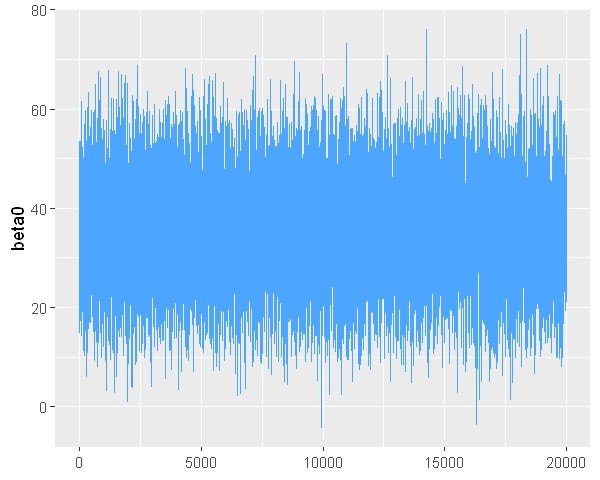

In [40]:
options(repr.plot.width=5,repr.plot.height=4)
mcmc_trace(Hitters.sample.01, pars=vars("beta0"))

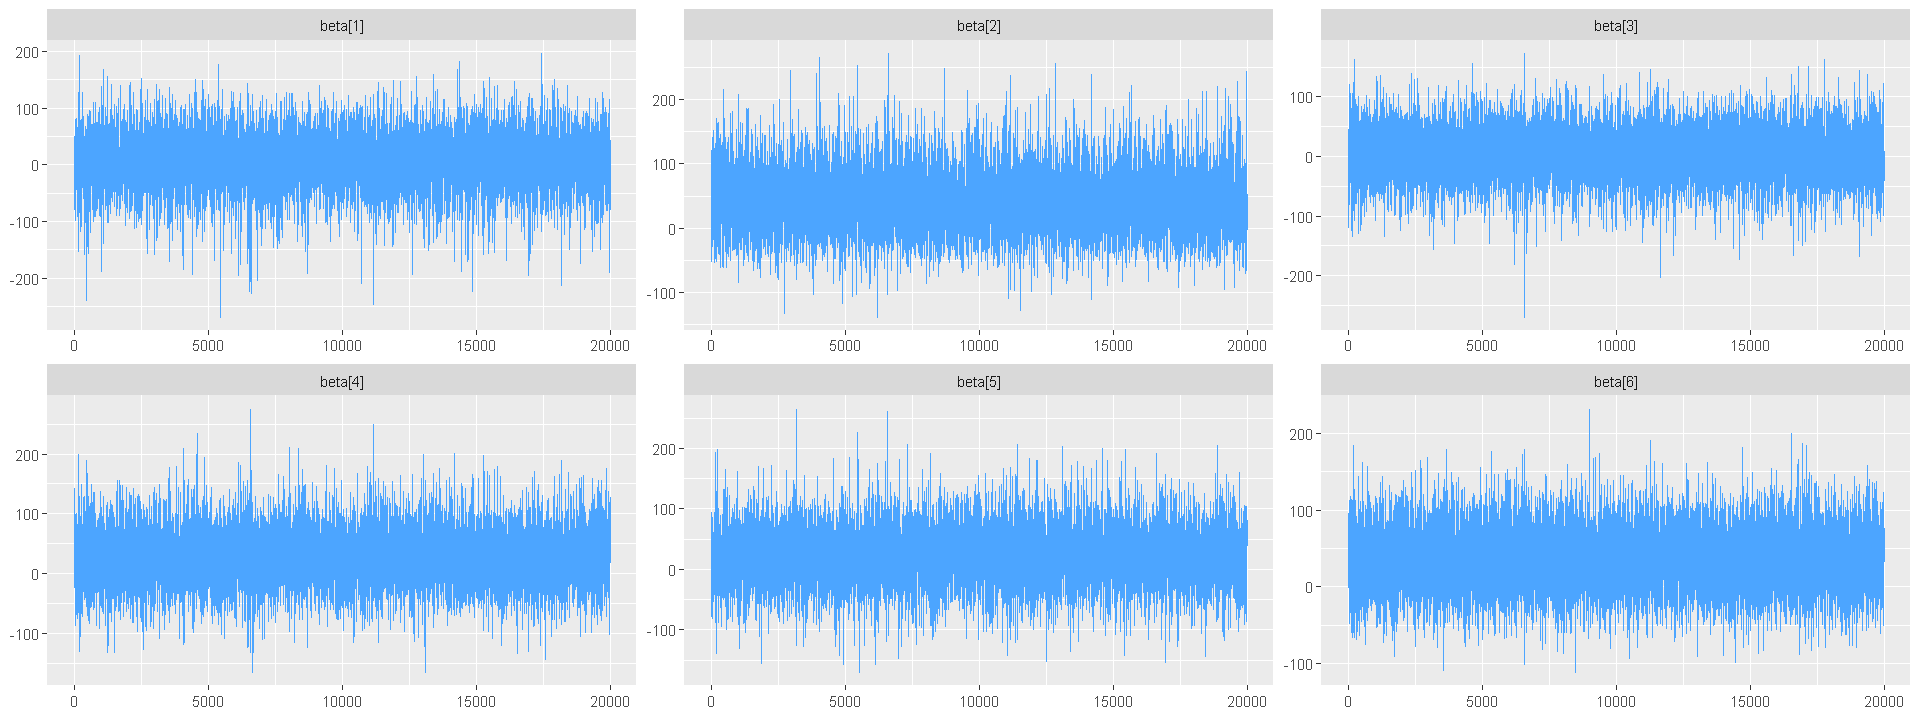

In [41]:
options(repr.plot.width=16,repr.plot.height=6)
mcmc_trace(Hitters.sample.01, pars=vars(param_range("beta", 1:6)))

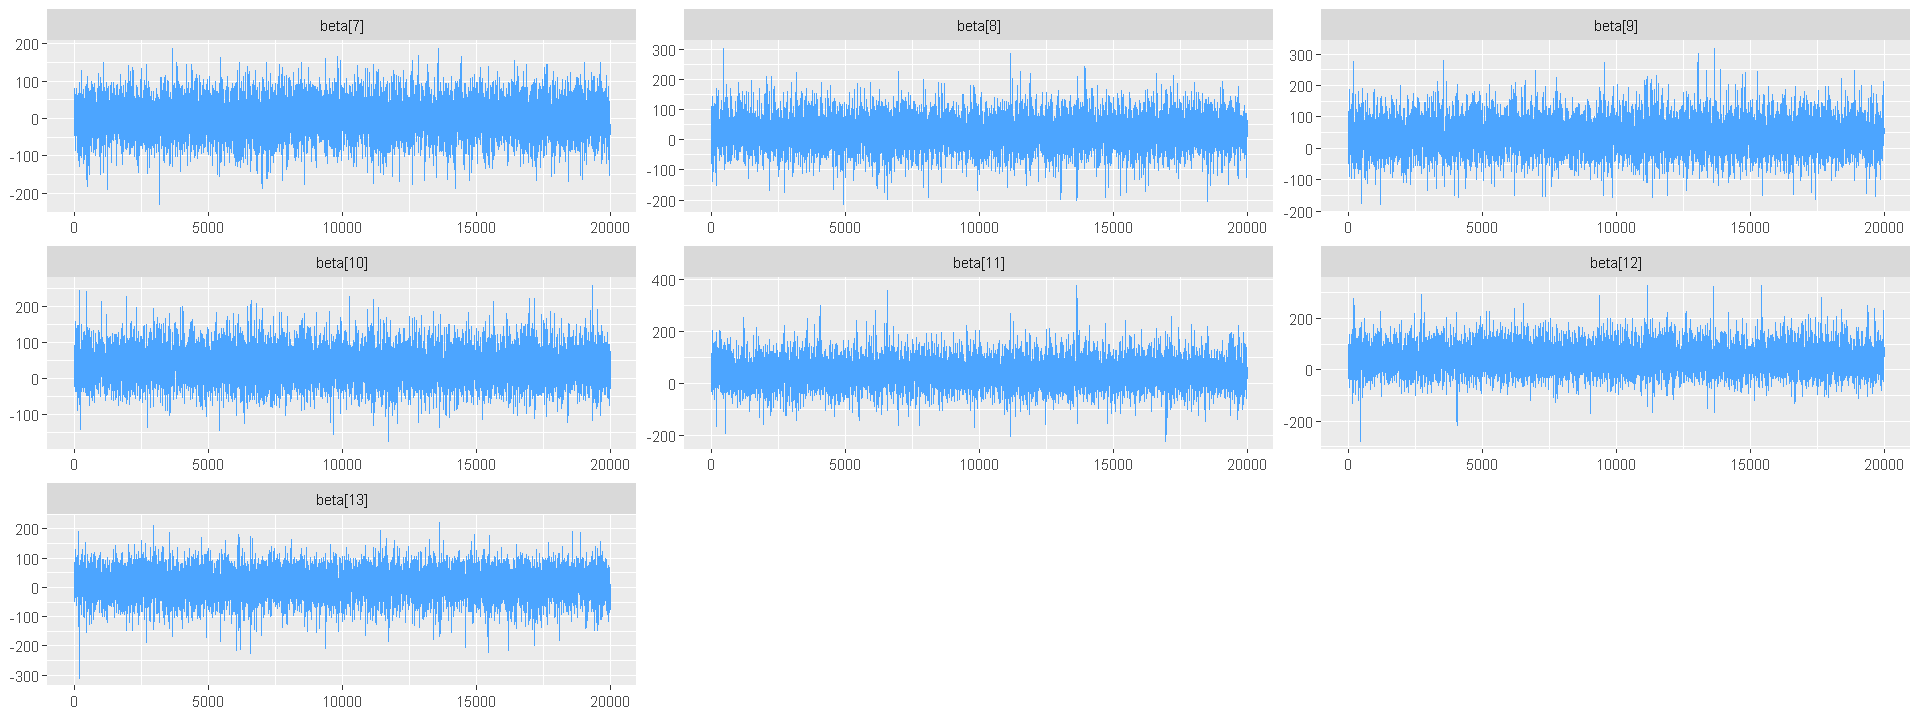

In [42]:
options(repr.plot.width=16,repr.plot.height=6)
mcmc_trace(Hitters.sample.01, pars=vars(param_range("beta", 7:13)))

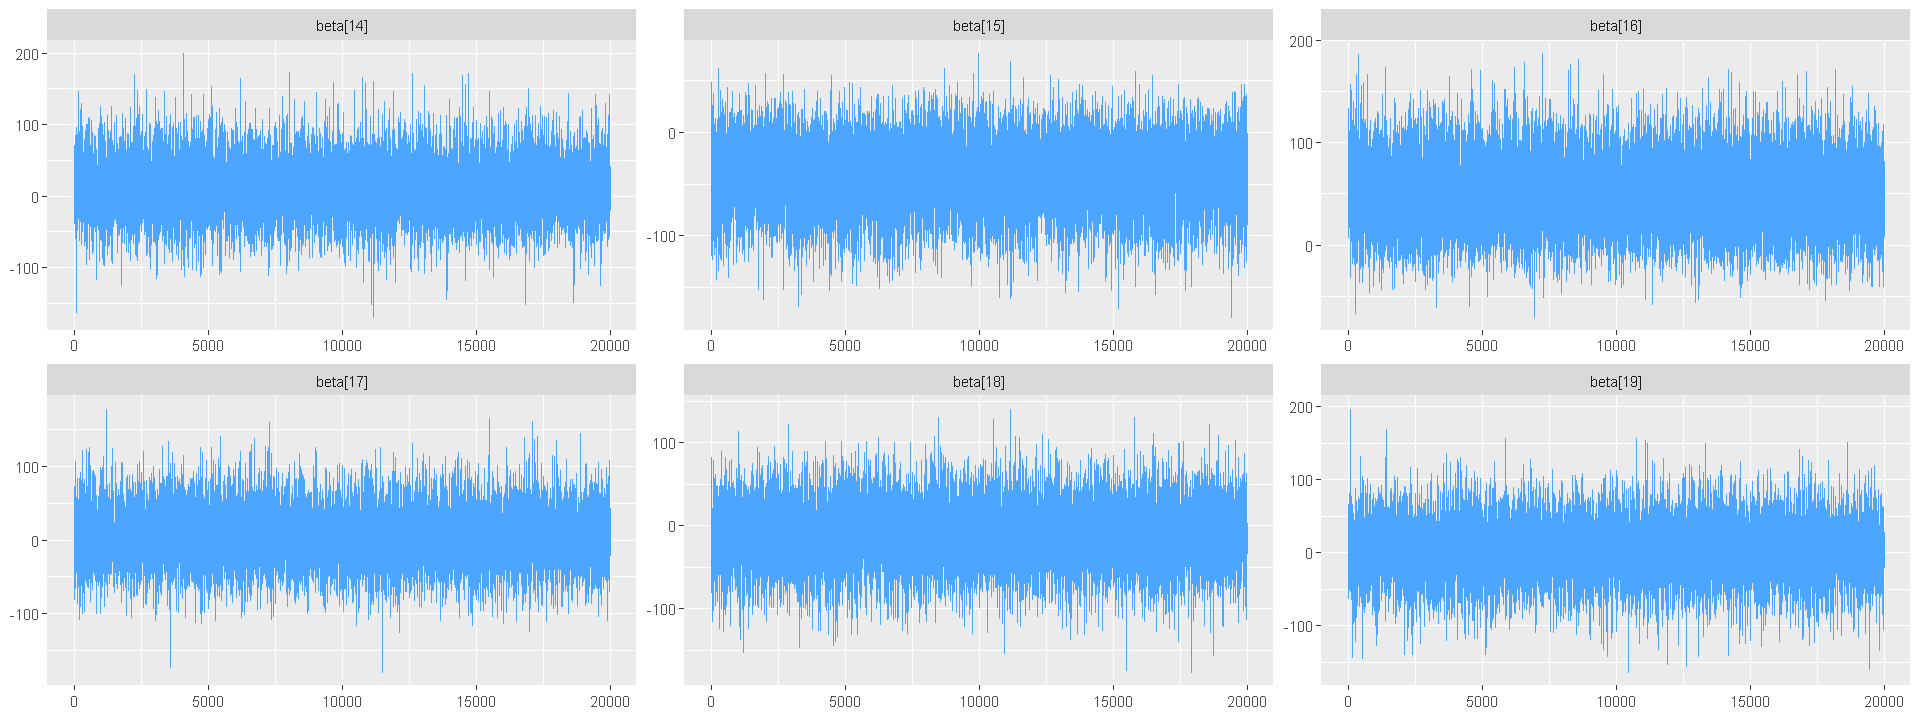

In [43]:
options(repr.plot.width=16,repr.plot.height=6)
mcmc_trace(Hitters.sample.01, pars=vars(param_range("beta", 14:19)))

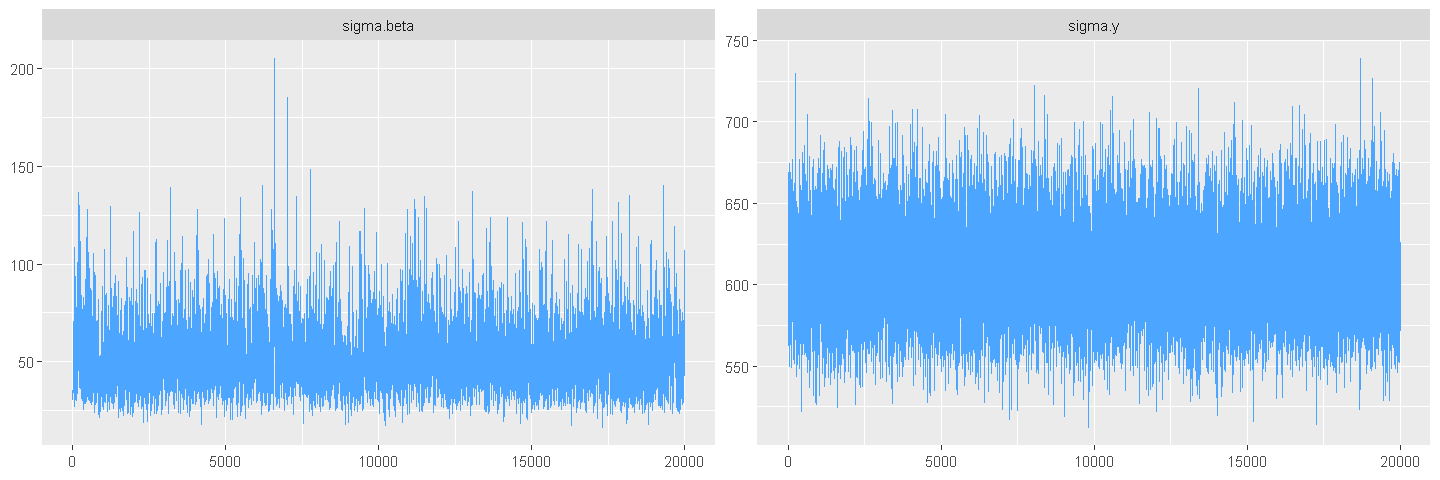

In [44]:
options(repr.plot.width=12,repr.plot.height=4)
mcmc_trace(Hitters.sample.01, pars=vars(contains("sigma")))

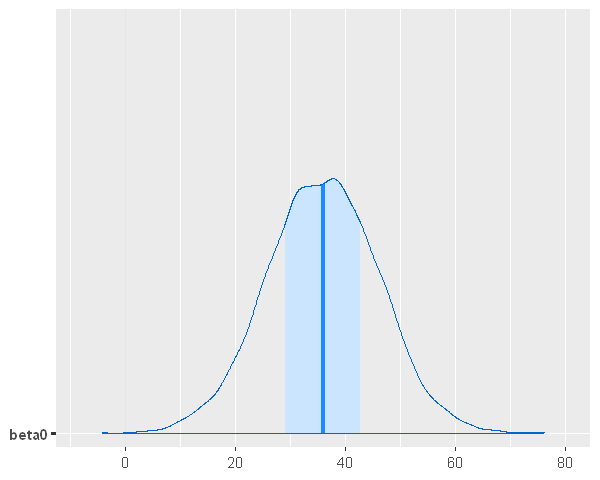

In [45]:
options(repr.plot.width=5,repr.plot.height=4)
mcmc_areas(Hitters.sample.01, pars=vars("beta0"))

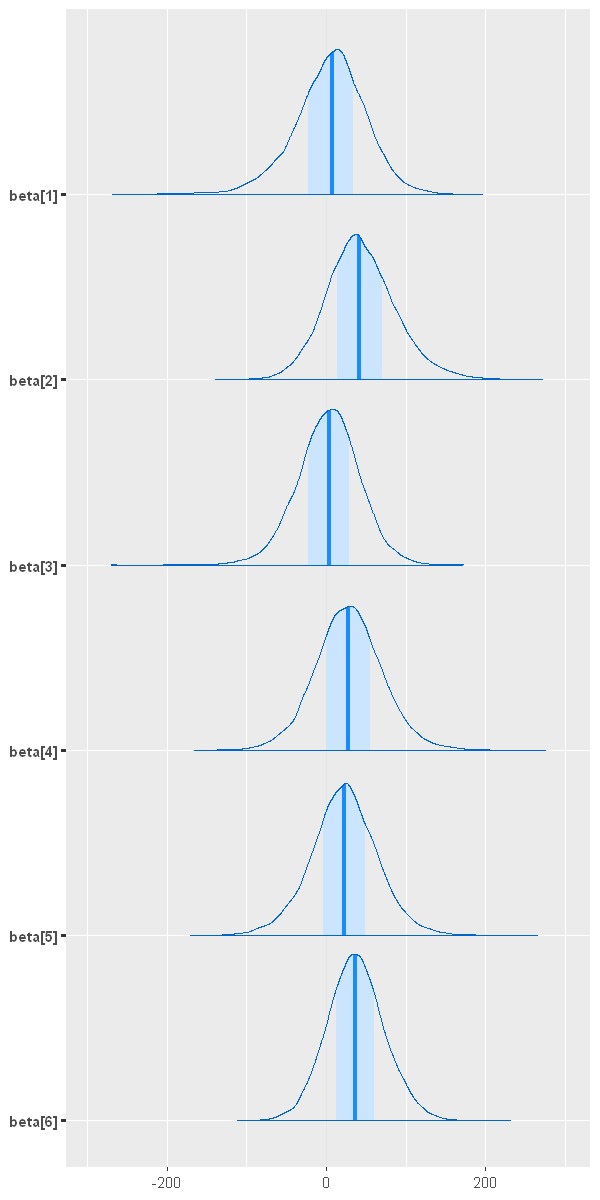

In [46]:
options(repr.plot.width=5,repr.plot.height=10)
mcmc_areas(Hitters.sample.01, pars=vars(param_range("beta", 1:6)))

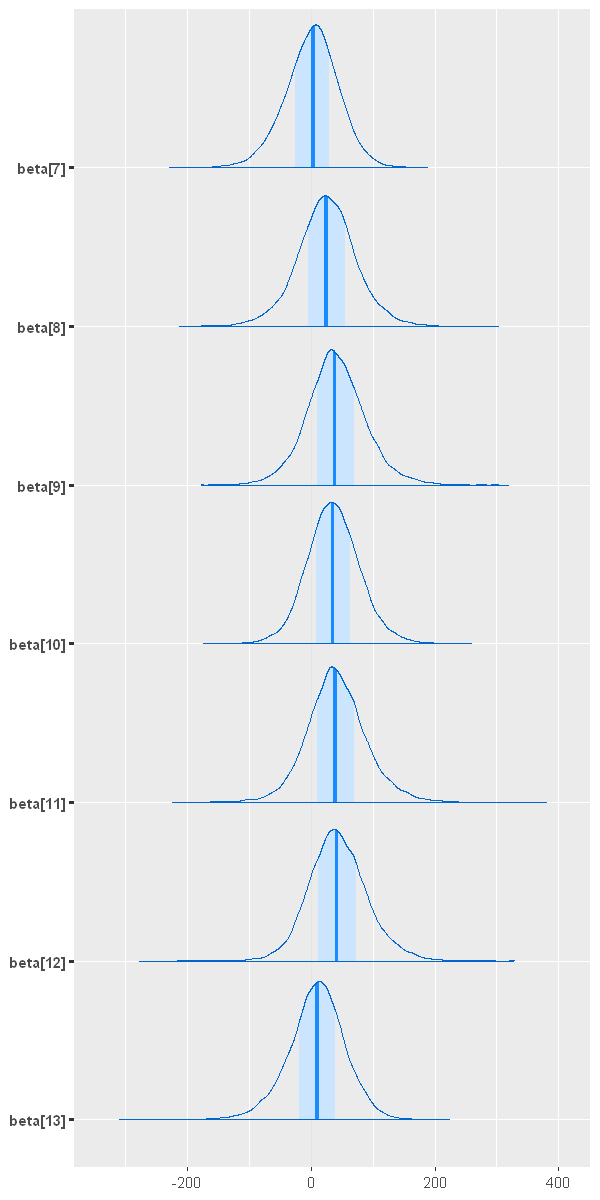

In [47]:
options(repr.plot.width=5,repr.plot.height=10)
mcmc_areas(Hitters.sample.01, pars=vars(param_range("beta", 7:13)))

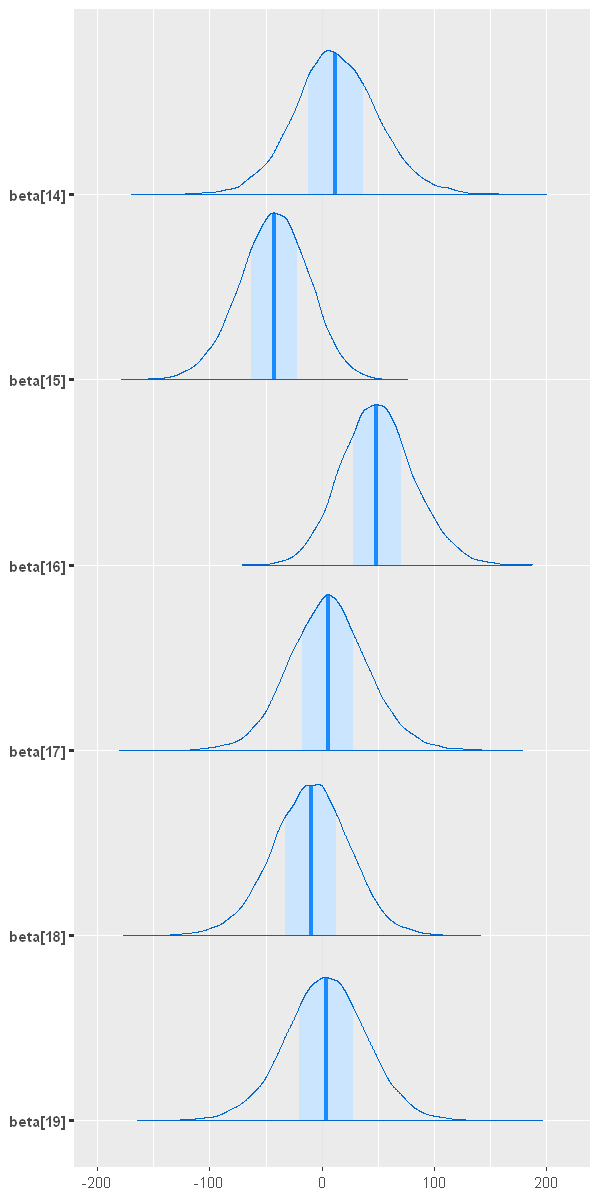

In [48]:
options(repr.plot.width=5,repr.plot.height=10)
mcmc_areas(Hitters.sample.01, pars=vars(param_range("beta", 14:19)))

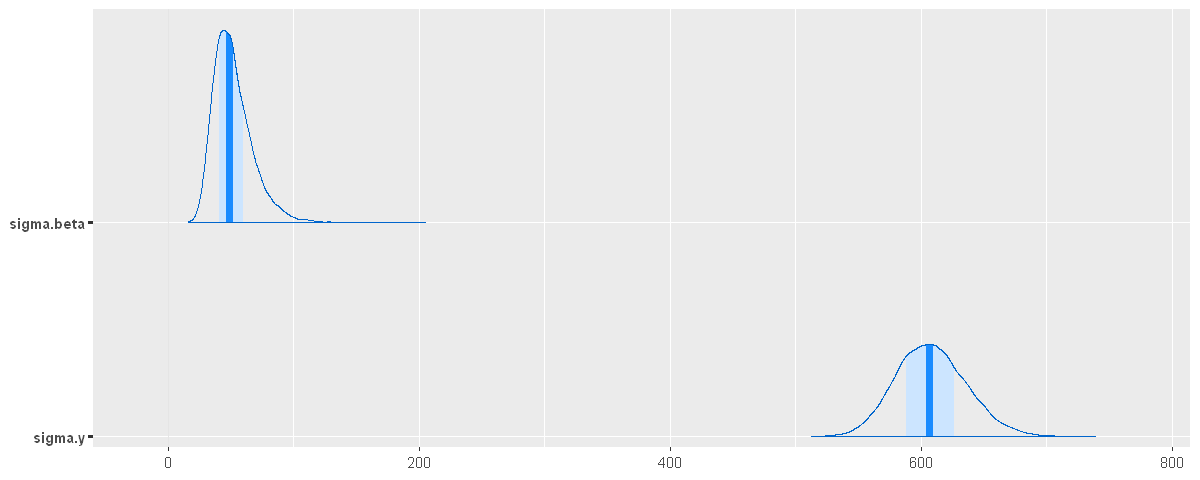

In [49]:
options(repr.plot.width=10,repr.plot.height=4)
mcmc_areas(Hitters.sample.01, pars=vars(contains("sigma")))

# Bayesian _Lasso_ with JAGS 

## 02 - Cauchy prior for the regression coefficients. 
### A common gamma prior for the regression coefficients' precision parameter.
### Gamma prior for the regression precision parameter

### Model:

$\beta_{0}$ is the intercept, $\beta=(\beta_{1},\dots,\beta_{p})$ is the vector of regression coefficients,   
$\tau_{y}=1/\sigma_{y}^{2}$ is the regression response precision parameter,   
$\tau_{\beta}=1/\sigma_{\beta}^{2}$ is the common precision parameter for the regression coefficients.

$$
    \begin{array}{lcl}
        y_{i}        &\sim    &\normaldist(\mu_{i},\sigma_{y}^{2}),\mskip45mu 1\leq i\leq n,\\[0.2cm]
        \mu_{i}      &=       &\beta_{0}+\sum_{j=1}^{p}x_{ij}\cdot \beta_{j}
                              =\beta_{0}+x_{i\,\cdot\,}\cdot \beta,\mskip45mu 1\leq i\leq n,\\[0.2cm]
        \beta_{0}    &\sim    &\normaldist(0,1.0E01),\\[0.2cm]
        \beta_{j}    &\sim    &\cauchydist(0,\sigma_{\beta}^{2}),\mskip45mu 1\leq j\leq p,\\[0.2cm]
        \tau_{\beta} &=       &1/\sigma_{\beta}^{2},\\[0.2cm]
        \tau_{\beta} &\sim    &\gammadist(0.01,0.01),\\[0.2cm]
        \tau_{y}     &=       &1/\sigma_{y}^{2},\\[0.2cm]
        \tau_{y}     &\sim    &\gammadist(0.01,0.01).
    \end{array}
$$

 <span class="MathJax_Preview" style="color: inherit; display: none;"> <span class="MathJax" id="MathJax-Element-10-Frame" tabindex="0" data-mathml="&lt;math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;&gt;&lt;msub&gt;&lt;mi&gt;&amp;#x03B2;&lt;/mi&gt;&lt;mi&gt;j&lt;/mi&gt;&lt;/msub&gt;&lt;mo&gt;&amp;#x223C;&lt;/mo&gt;&lt;mstyle displaystyle=&quot;false&quot; scriptlevel=&quot;0&quot;&gt;&lt;mtext&gt;Normal&lt;/mtext&gt;&lt;/mstyle&gt;&lt;mo stretchy=&quot;false&quot;&gt;(&lt;/mo&gt;&lt;mn&gt;0&lt;/mn&gt;&lt;mo&gt;,&lt;/mo&gt;&lt;msubsup&gt;&lt;mi&gt;&amp;#x03C3;&lt;/mi&gt;&lt;mi&gt;b&lt;/mi&gt;&lt;mn&gt;2&lt;/mn&gt;&lt;/msubsup&gt;&lt;mo stretchy=&quot;false&quot;&gt;)&lt;/mo&gt;&lt;/math&gt;" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-122" style="width: 10.009em; display: inline-block;"><span style="display: inline-block; position: relative; width: 8.335em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.248em, 1008.23em, 2.601em, -999.998em); top: -2.171em; left: 0em;"><span class="mrow" id="MathJax-Span-123"><span class="msubsup" id="MathJax-Span-124"><span style="display: inline-block; position: relative; width: 0.928em; height: 0px;"><span style="position: absolute; clip: rect(3.171em, 1000.57em, 4.275em, -999.998em); top: -3.987em; left: 0em;"><span class="mi" id="MathJax-Span-125" style="font-family: MathJax_Math-italic;">β<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.002em;">  <span style="display: inline-block; width: 0px; height: 3.99em;">  <span style="position: absolute; top: -3.844em; left: 0.572em;"><span class="mi" id="MathJax-Span-126" style="font-size: 70.7%; font-family: MathJax_Math-italic;">j <span style="display: inline-block; width: 0px; height: 3.99em;">    <span class="mo" id="MathJax-Span-127" style="font-family: MathJax_Main; padding-left: 0.287em;">∼ <span class="mstyle" id="MathJax-Span-128" style="padding-left: 0.287em;"><span class="mrow" id="MathJax-Span-129"><span class="mtext" id="MathJax-Span-130" style="font-family: MathJax_Main;">Normal   <span class="mo" id="MathJax-Span-131" style="font-family: MathJax_Main;">( <span class="mn" id="MathJax-Span-132" style="font-family: MathJax_Main;">0 <span class="mo" id="MathJax-Span-133" style="font-family: MathJax_Main;">, <span class="msubsup" id="MathJax-Span-134" style="padding-left: 0.18em;"><span style="display: inline-block; position: relative; width: 1.07em; height: 0px;"><span style="position: absolute; clip: rect(3.456em, 1000.57em, 4.097em, -999.998em); top: -3.987em; left: 0em;"><span class="mi" id="MathJax-Span-135" style="font-family: MathJax_Math-italic;">σ<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.002em;">  <span style="display: inline-block; width: 0px; height: 3.99em;">  <span style="position: absolute; clip: rect(3.421em, 1000.43em, 4.097em, -999.998em); top: -4.343em; left: 0.607em;"><span class="mn" id="MathJax-Span-136" style="font-size: 70.7%; font-family: MathJax_Main;">2 <span style="display: inline-block; width: 0px; height: 3.99em;">  <span style="position: absolute; clip: rect(3.385em, 1000.39em, 4.097em, -999.998em); top: -3.666em; left: 0.572em;"><span class="mi" id="MathJax-Span-137" style="font-size: 70.7%; font-family: MathJax_Math-italic;">b <span style="display: inline-block; width: 0px; height: 3.99em;">    <span class="mo" id="MathJax-Span-138" style="font-family: MathJax_Main;">)  <span style="display: inline-block; width: 0px; height: 2.174em;">   <span style="display: inline-block; overflow: hidden; vertical-align: -0.425em; border-left: 0px solid; width: 0px; height: 1.455em;">  </nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msub><mi>β</mi><mi>j</mi></msub><mo>∼</mo><mstyle displaystyle="false" scriptlevel="0"><mtext>Normal</mtext></mstyle><mo stretchy="false">(</mo><mn>0</mn><mo>,</mo><msubsup><mi>σ</mi><mi>b</mi><mn>2</mn></msubsup><mo stretchy="false">)</mo></math>  <script type="math/tex" id="MathJax-Element-10">\beta_j \sim \mbox{Normal}(0,\sigma_b^2)</script> where <span class="MathJax_Preview" style="color: inherit; display: none;"> <span class="MathJax" id="MathJax-Element-11-Frame" tabindex="0" data-mathml="&lt;math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;&gt;&lt;msubsup&gt;&lt;mi&gt;&amp;#x03C3;&lt;/mi&gt;&lt;mi&gt;b&lt;/mi&gt;&lt;mn&gt;2&lt;/mn&gt;&lt;/msubsup&gt;&lt;mo&gt;&amp;#x223C;&lt;/mo&gt;&lt;mstyle displaystyle=&quot;false&quot; scriptlevel=&quot;0&quot;&gt;&lt;mtext&gt;InvGamma&lt;/mtext&gt;&lt;/mstyle&gt;&lt;mo stretchy=&quot;false&quot;&gt;(&lt;/mo&gt;&lt;mn&gt;0.01&lt;/mn&gt;&lt;mo&gt;,&lt;/mo&gt;&lt;mn&gt;0.01&lt;/mn&gt;&lt;mo stretchy=&quot;false&quot;&gt;)&lt;/mo&gt;&lt;/math&gt;" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-139" style="width: 14.532em; display: inline-block;"><span style="display: inline-block; position: relative; width: 12.11em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.248em, 1012em, 2.601em, -999.998em); top: -2.171em; left: 0em;"><span class="mrow" id="MathJax-Span-140"><span class="msubsup" id="MathJax-Span-141"><span style="display: inline-block; position: relative; width: 1.07em; height: 0px;"><span style="position: absolute; clip: rect(3.456em, 1000.57em, 4.097em, -999.998em); top: -3.987em; left: 0em;"><span class="mi" id="MathJax-Span-142" style="font-family: MathJax_Math-italic;">σ<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.002em;">  <span style="display: inline-block; width: 0px; height: 3.99em;">  <span style="position: absolute; clip: rect(3.421em, 1000.43em, 4.097em, -999.998em); top: -4.343em; left: 0.607em;"><span class="mn" id="MathJax-Span-143" style="font-size: 70.7%; font-family: MathJax_Main;">2 <span style="display: inline-block; width: 0px; height: 3.99em;">  <span style="position: absolute; clip: rect(3.385em, 1000.39em, 4.097em, -999.998em); top: -3.666em; left: 0.572em;"><span class="mi" id="MathJax-Span-144" style="font-size: 70.7%; font-family: MathJax_Math-italic;">b <span style="display: inline-block; width: 0px; height: 3.99em;">    <span class="mo" id="MathJax-Span-145" style="font-family: MathJax_Main; padding-left: 0.287em;">∼ <span class="mstyle" id="MathJax-Span-146" style="padding-left: 0.287em;"><span class="mrow" id="MathJax-Span-147"><span class="mtext" id="MathJax-Span-148" style="font-family: MathJax_Main;">InvGamma   <span class="mo" id="MathJax-Span-149" style="font-family: MathJax_Main;">( <span class="mn" id="MathJax-Span-150" style="font-family: MathJax_Main;">0.01 <span class="mo" id="MathJax-Span-151" style="font-family: MathJax_Main;">, <span class="mn" id="MathJax-Span-152" style="font-family: MathJax_Main; padding-left: 0.18em;">0.01 <span class="mo" id="MathJax-Span-153" style="font-family: MathJax_Main;">)  <span style="display: inline-block; width: 0px; height: 2.174em;">   <span style="display: inline-block; overflow: hidden; vertical-align: -0.425em; border-left: 0px solid; width: 0px; height: 1.455em;">  </nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msubsup><mi>σ</mi><mi>b</mi><mn>2</mn></msubsup><mo>∼</mo><mstyle displaystyle="false" scriptlevel="0"><mtext>InvGamma</mtext></mstyle><mo stretchy="false">(</mo><mn>0.01</mn><mo>,</mo><mn>0.01</mn><mo stretchy="false">)</mo></math>  <script type="math/tex" id="MathJax-Element-11">\sigma_b^2\sim\mbox{InvGamma}(0.01,0.01)</script>.</h2>

In [50]:
Hitters.model.String.02 <- "model{
# Likelihood
    for(i in 1:n){
        y[i] ~ dnorm(mu[i], tau.y)
        mu[i] <- beta0 + inprod(x[i,],beta[]) 
        }
# A gaussian prior with a small precision for the intercept beta0 and the vector beta of regression coefficients
    beta0 ~ dnorm(0, 0.01)
    for(j in 1:p){
        beta[j] ~ dt(0,tau.beta,1)
        }

# Priors for the precision parameters 
    sigma.y <- 1.0/sqrt(tau.y)
    sigma.beta <- 1.0/sqrt(tau.beta)
    tau.y    ~ dgamma(0.01, 0.01)
    tau.beta ~ dgamma(0.01, 0.01)
}" 

In [51]:
Hitters.data.list.02<-list(y = y, n = n, p = p, x = x0)

## Compile the model in JAGS

In [52]:
Hitters.model.02<-jags.model(textConnection(Hitters.model.String.02),data=Hitters.data.list.02)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 263
   Unobserved stochastic nodes: 22
   Total graph size: 6081

Initializing model



In [54]:
update(Hitters.model.02, 5000, progress.bar = "gui")

In [56]:
Hitters.sample.02<-coda.samples(Hitters.model.02, variable.names = c("beta0", "beta", "sigma.y", "sigma.beta"), 
                 n.iter = 25000, progress.bar = "gui") 

In [57]:
summary(Hitters.sample.02)


Iterations = 6001:31000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 25000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

              Mean    SD Naive SE Time-series SE
beta[1]      5.306 41.35  0.26150        0.90911
beta[2]     47.858 63.13  0.39928        1.46725
beta[3]      3.414 26.91  0.17021        0.38748
beta[4]     27.367 48.89  0.30920        0.97920
beta[5]     16.602 38.75  0.24506        0.67890
beta[6]     27.377 38.92  0.24615        0.57239
beta[7]     -4.581 35.62  0.22530        0.64739
beta[8]     13.499 57.78  0.36542        1.71795
beta[9]     43.781 80.95  0.51197        3.01420
beta[10]    21.210 47.95  0.30328        1.06039
beta[11]    58.012 89.63  0.56685        3.31694
beta[12]    72.044 96.06  0.60754        3.91397
beta[13]     2.605 37.18  0.23515        0.72646
beta[14]     6.398 23.78  0.15037        0.32936
beta[15]   -26.394 31.67  0.20032        0.42367
beta[16]    36.92

In [58]:
#plot(Hitters.sample.02) 

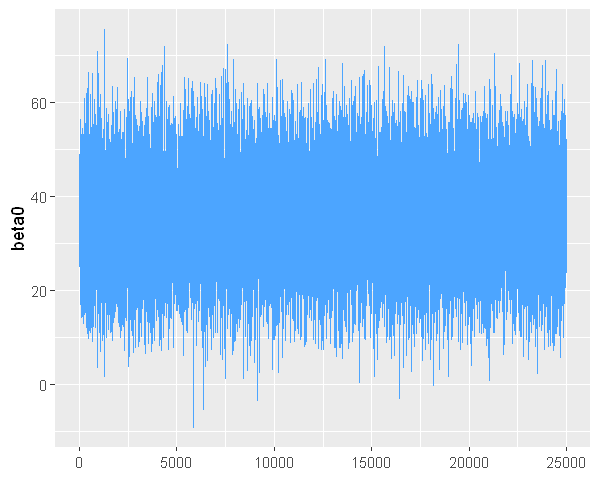

In [59]:
options(repr.plot.width=5,repr.plot.height=4)
mcmc_trace(Hitters.sample.02, pars=vars("beta0"))

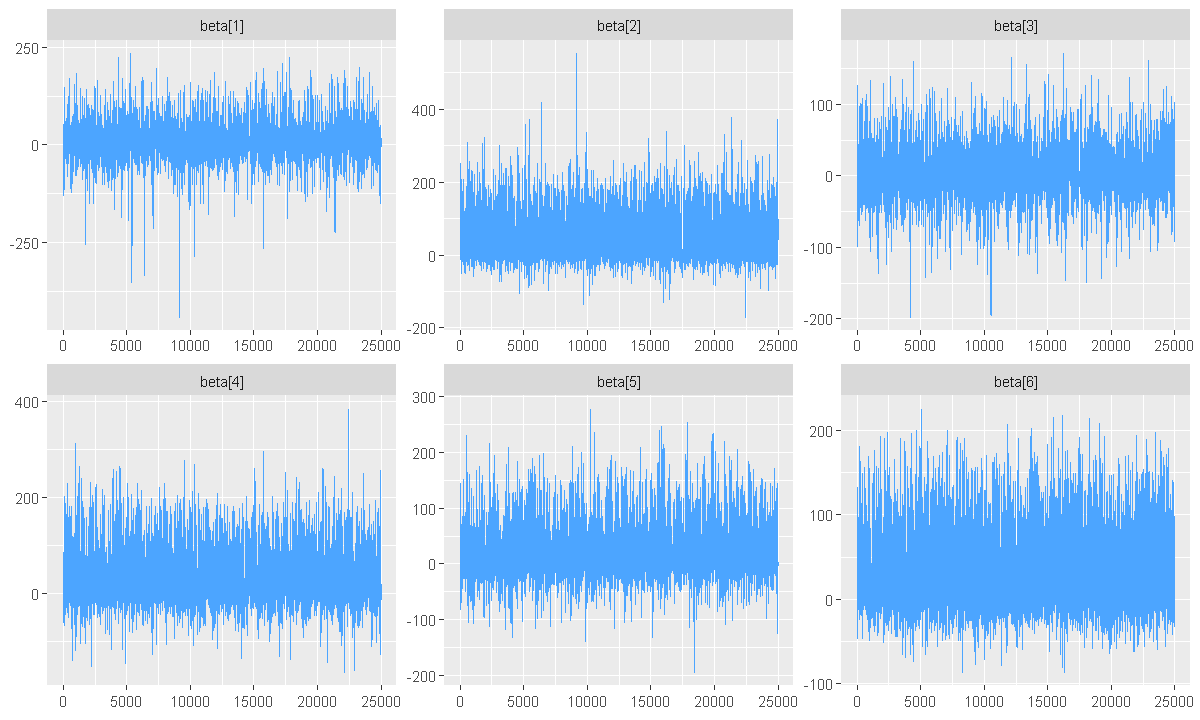

In [60]:
options(repr.plot.width=10,repr.plot.height=6)
mcmc_trace(Hitters.sample.02, pars=vars(param_range("beta", 1:6)))

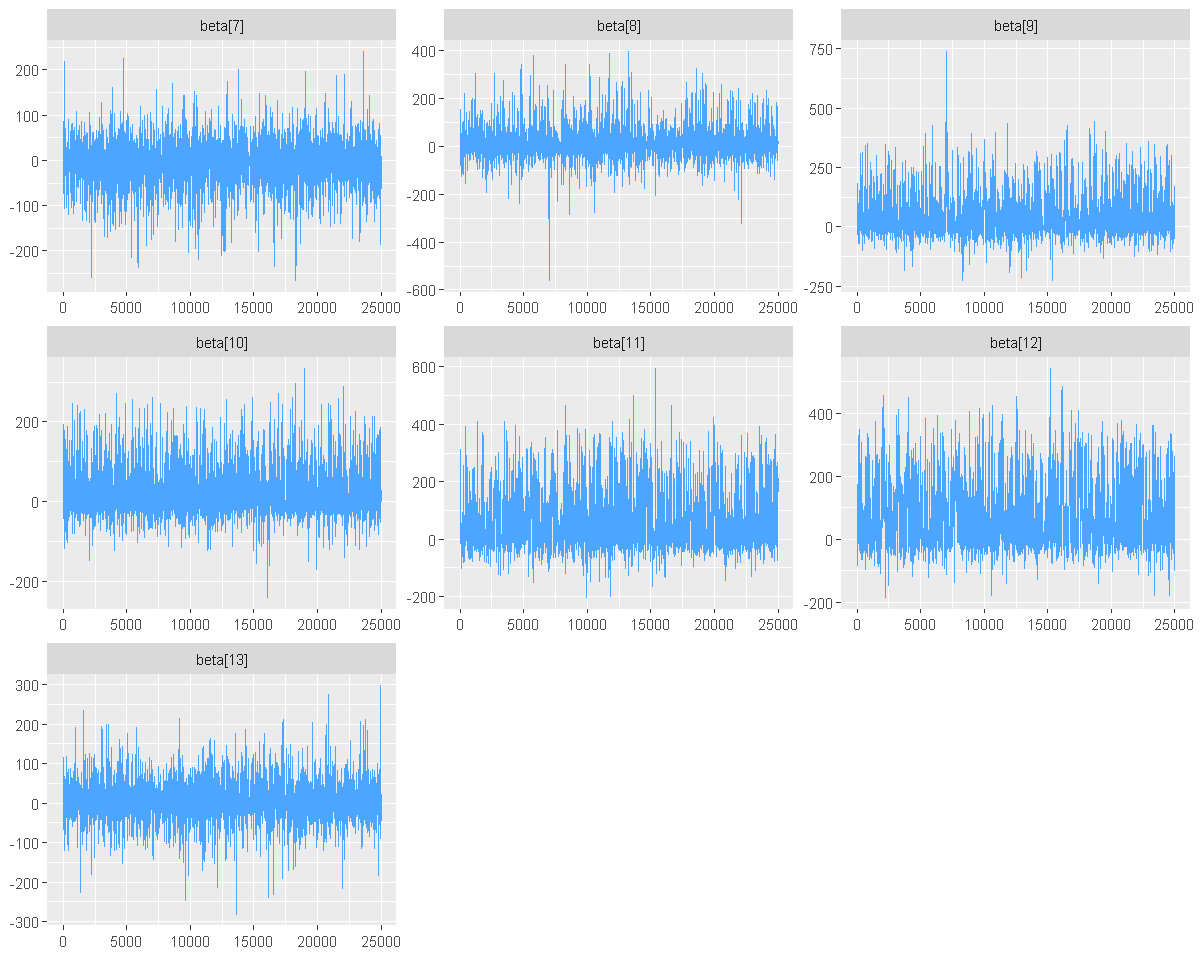

In [61]:
options(repr.plot.width=10,repr.plot.height=8)
mcmc_trace(Hitters.sample.02, pars=vars(param_range("beta", 7:13)))

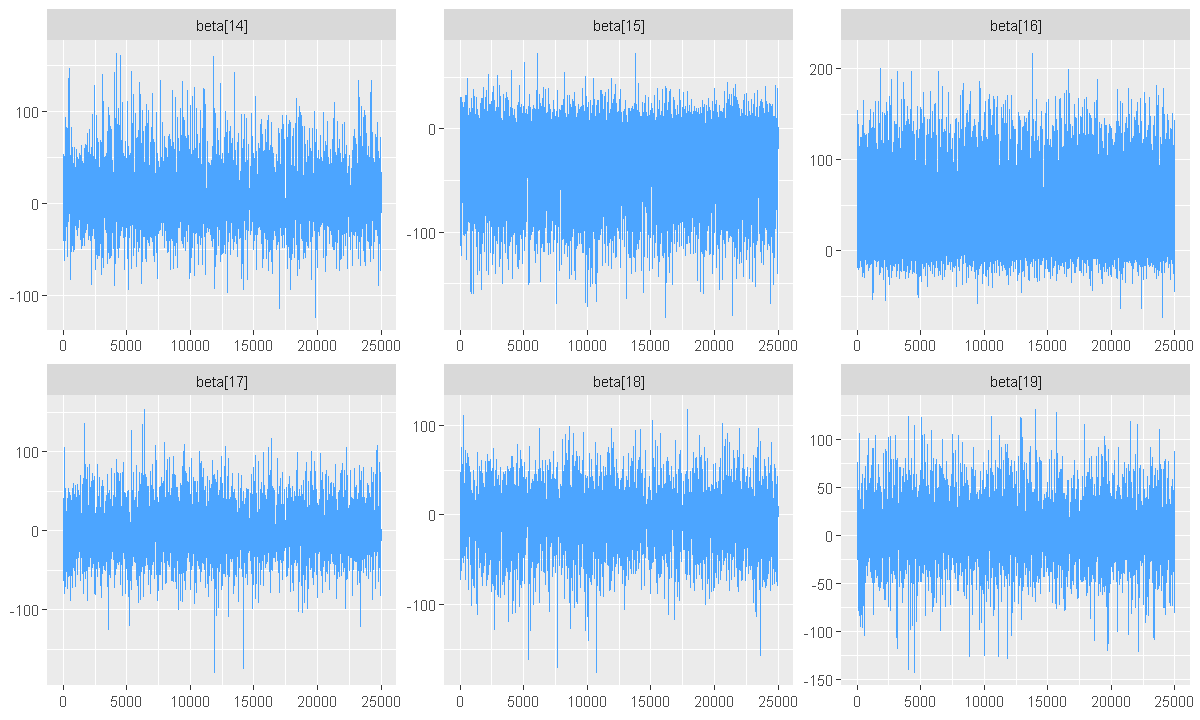

In [62]:
options(repr.plot.width=10,repr.plot.height=6)
mcmc_trace(Hitters.sample.02, pars=vars(param_range("beta", 14:19)))

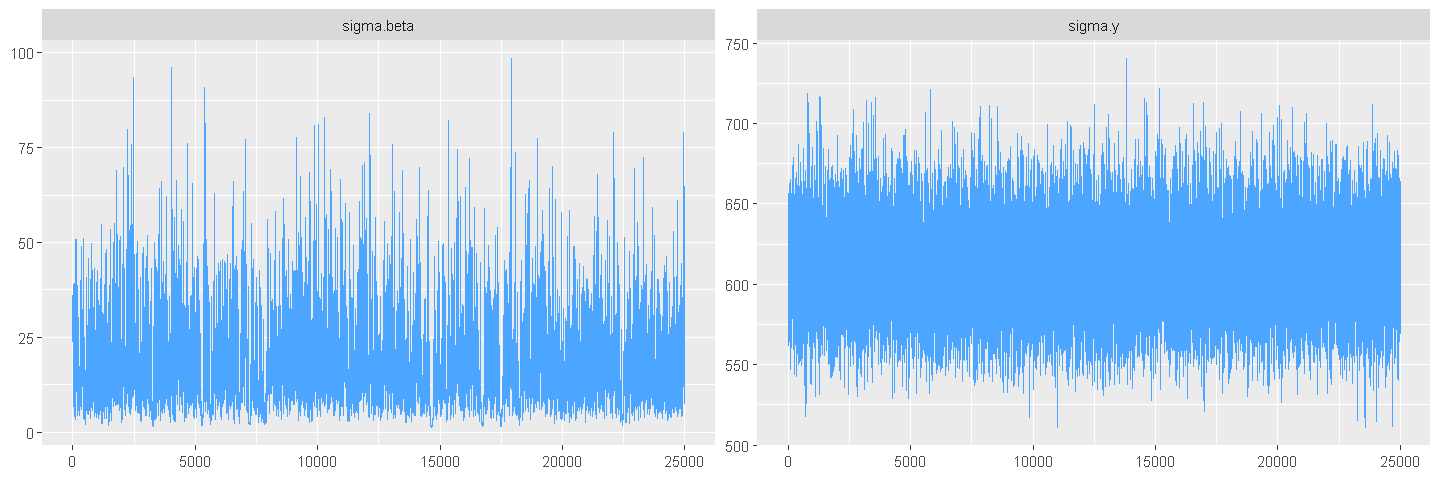

In [63]:
options(repr.plot.width=12,repr.plot.height=4)
mcmc_trace(Hitters.sample.02, pars=vars(contains("sigma")))

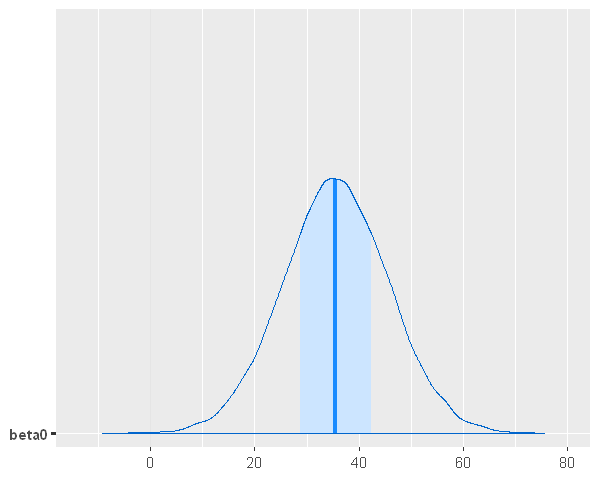

In [ ]:
options(repr.plot.width=5,repr.plot.height=4)
mcmc_areas(Hitters.sample.02, pars=vars("beta0"))

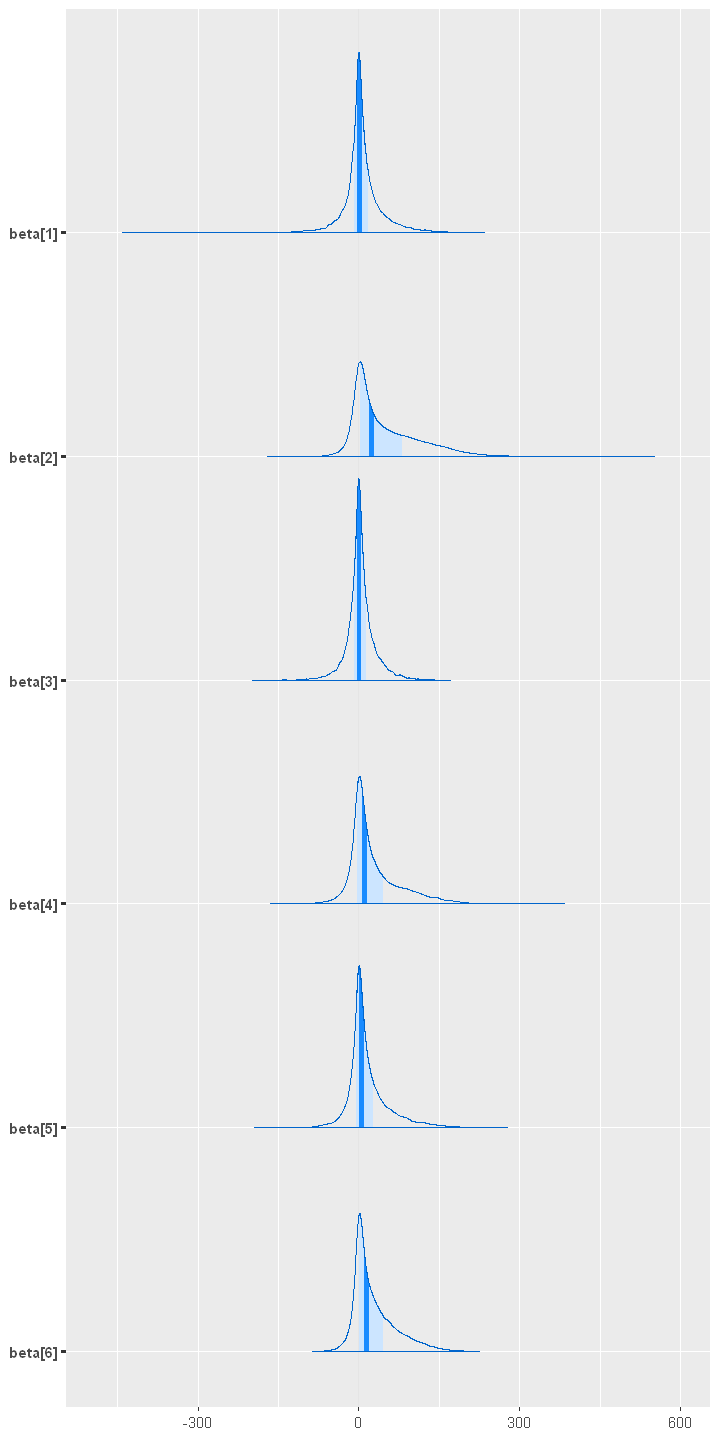

In [ ]:
options(repr.plot.width=6,repr.plot.height=12)
mcmc_areas(Hitters.sample.02, pars=vars(param_range("beta", 1:6)))

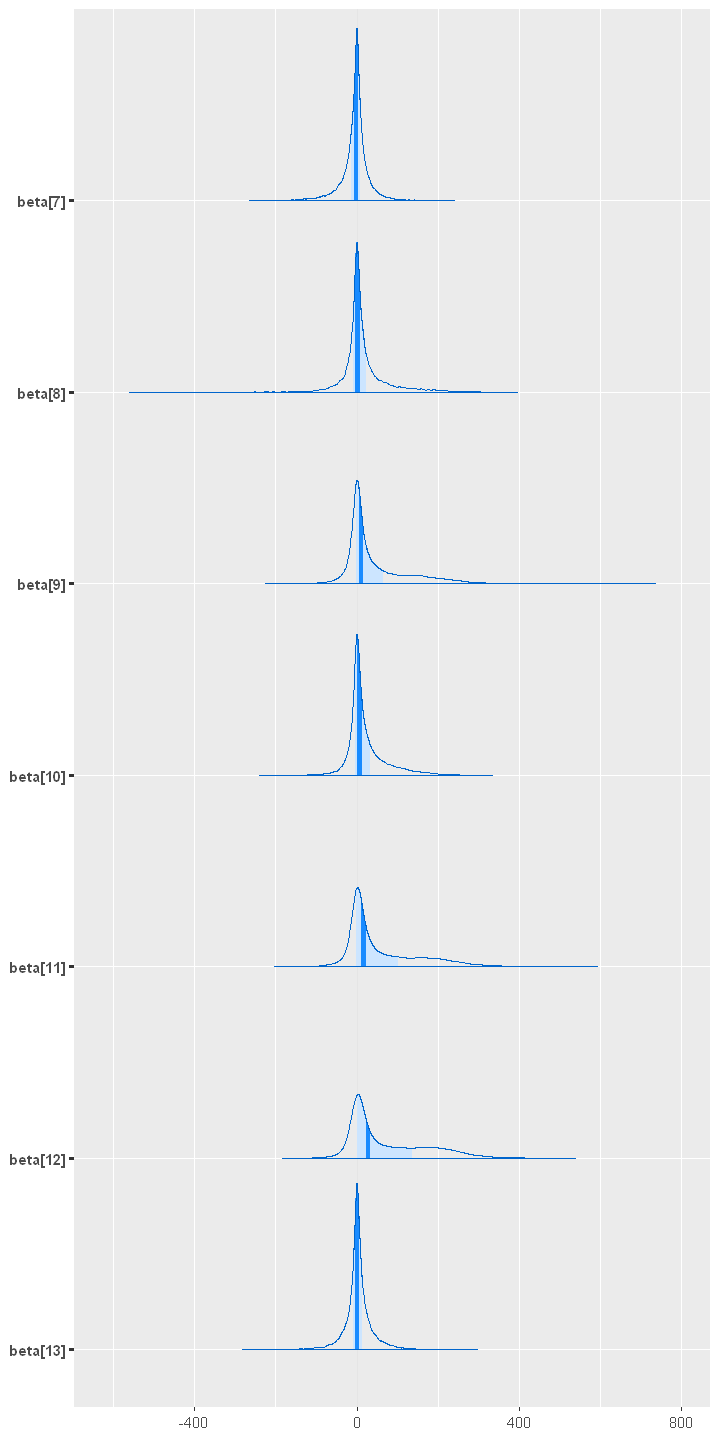

In [ ]:
options(repr.plot.width=6,repr.plot.height=12)
mcmc_areas(Hitters.sample.02, pars=vars(param_range("beta", 7:13)))

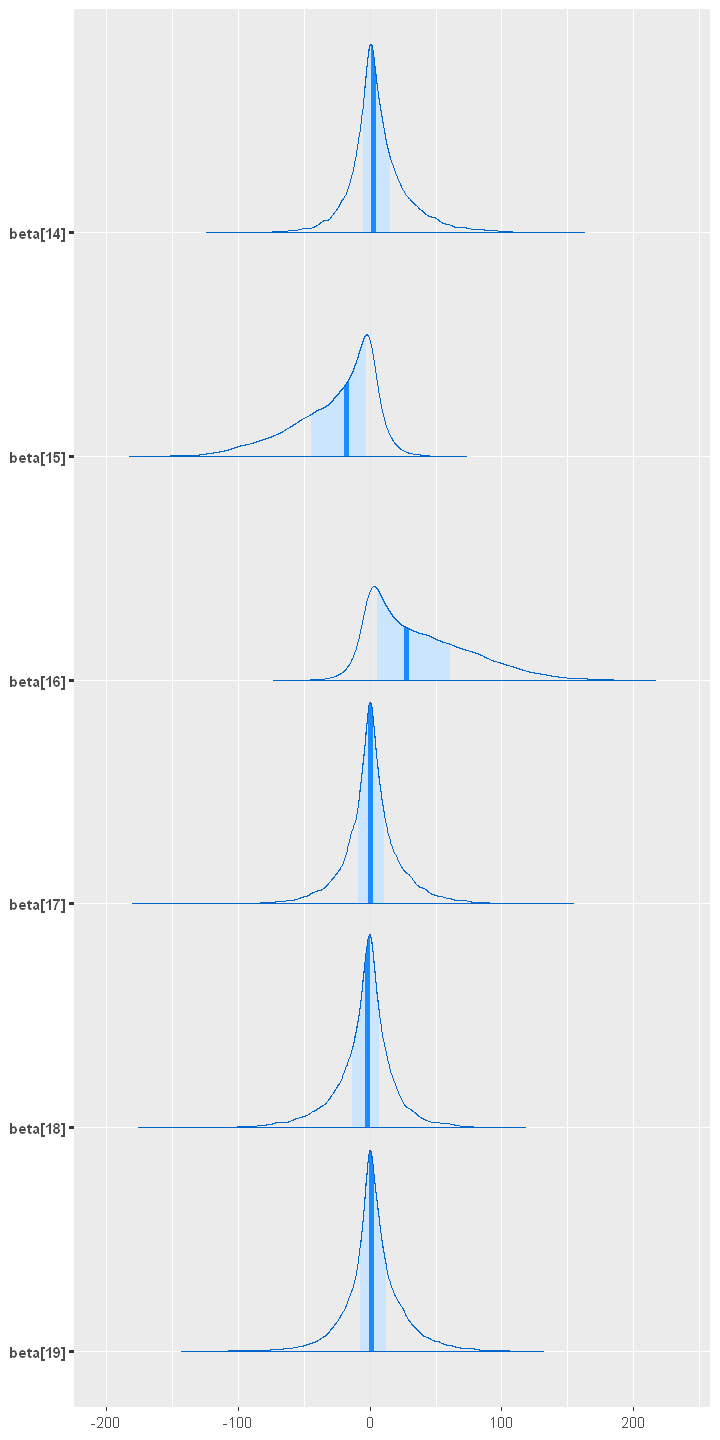

In [ ]:
options(repr.plot.width=6,repr.plot.height=12)
mcmc_areas(Hitters.sample.02, pars=vars(param_range("beta", 14:19)))

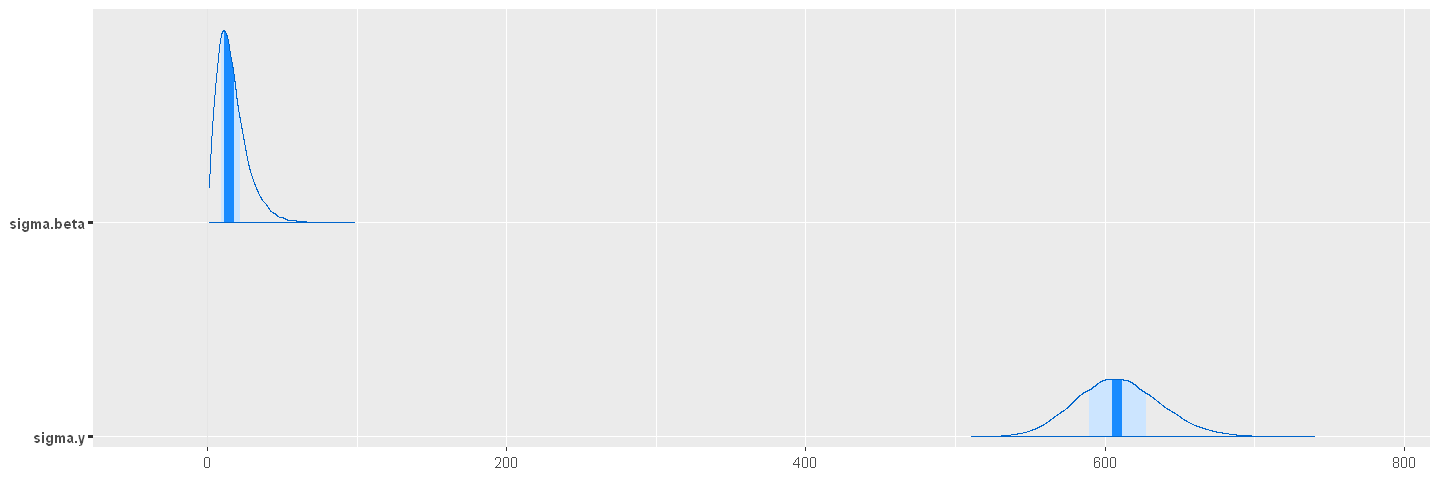

In [ ]:
options(repr.plot.width=12,repr.plot.height=4)
mcmc_areas(Hitters.sample.02, pars=vars(contains("sigma")))

## 03 - Laplace (double exponential) prior for the regression coefficients. 
### A common gamma prior for the regression coefficients' precision parameter.
### Gamma prior for the regression precision parameter

### Model:

$\beta_{0}$ is the intercept, $\beta=(\beta_{1},\dots,\beta_{p})$ is the vector of regression coefficients,   
$\tau_{y}=1/\sigma_{y}^{2}$ is the regression response precision parameter,   
$\tau_{\beta}=1/\sigma_{\beta}^{2}$ is the common precision parameter for the regression coefficients.

$$
    \begin{array}{lcl}
        y_{i}        &\sim    &\normaldist(\mu_{i},\sigma_{y}^{2}),\mskip45mu 1\leq i\leq n,\\[0.2cm]
        \mu_{i}      &=       &\beta_{0}+\sum_{j=1}^{p}x_{ij}\cdot \beta_{j}
                              =\beta_{0}+x_{i\,\cdot\,}\cdot \beta,\mskip45mu 1\leq i\leq n,\\[0.2cm]
        \beta_{0}    &\sim    &\normaldist(0,1.0E01),\\[0.2cm]
        \beta_{j}    &\sim    &\dexpdist (0,\sigma_{\beta}^{2}),\mskip45mu 1\leq j\leq p,\\[0.2cm]
        \tau_{\beta} &=       &1/\sigma_{\beta}^{2},\\[0.2cm]
        \tau_{\beta} &\sim    &\gammadist(0.01,0.01),\\[0.2cm]
        \tau_{y}     &=       &1/\sigma_{y}^{2},\\[0.2cm]
        \tau_{y}     &\sim    &\gammadist(0.01,0.01).
    \end{array}
$$

In [ ]:
Hitters.model.String.03 <- "model{
# Likelihood
    for(i in 1:n){
        y[i] ~ dnorm(mu[i], tau.y)
        mu[i] <- beta0 + inprod(x[i,],beta[]) 
        }
# A gaussian prior with a small precision for the intercept beta0 and the vector beta of regression coefficients
    beta0 ~ dnorm(0, 0.01)
    for(j in 1:p){
        beta[j] ~ ddexp(0,tau.beta)
        }

# Priors for the precision parameters 
    sigma.y <- 1.0/sqrt(tau.y)
    sigma.beta <- 1.0/sqrt(tau.beta)
    tau.y    ~ dgamma(0.01, 0.01)
    tau.beta ~ dgamma(0.01, 0.01)
}" 

In [ ]:
Hitters.data.list.03<-list(y = y, n = n, p = p, x = x0)

## Compile the model in JAGS

In [71]:
Hitters.model.03<-jags.model(textConnection(Hitters.model.String.03),data=Hitters.data.list.03)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 263
   Unobserved stochastic nodes: 22
   Total graph size: 6081

Initializing model



In [72]:
update(Hitters.model.03, 5000, progress.bar = "gui")

In [73]:
Hitters.sample.03<-coda.samples(Hitters.model.03, variable.names = c("beta0", "beta", "sigma.y", "sigma.beta"), 
                 n.iter = 25000, progress.bar = "gui") 

In [74]:
summary(Hitters.sample.03)


Iterations = 6001:31000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 25000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

              Mean    SD Naive SE Time-series SE
beta[1]      3.572 45.68 0.288934        0.78315
beta[2]     47.983 54.80 0.346568        1.00215
beta[3]      3.325 34.56 0.218595        0.42901
beta[4]     26.559 45.38 0.286982        0.67398
beta[5]     19.661 41.67 0.263520        0.58164
beta[6]     35.812 39.59 0.250396        0.48672
beta[7]     -1.525 41.60 0.263126        0.63661
beta[8]     21.729 54.02 0.341679        1.01497
beta[9]     44.580 61.48 0.388860        1.23367
beta[10]    33.353 48.01 0.303645        0.79059
beta[11]    45.210 63.20 0.399688        1.40272
beta[12]    48.706 63.59 0.402197        1.27955
beta[13]     6.455 45.69 0.288986        0.78398
beta[14]     9.928 32.32 0.204433        0.36757
beta[15]   -38.188 32.63 0.206389        0.29813
beta[16]    46.94

In [75]:
#plot(Hitters.sample.03) 

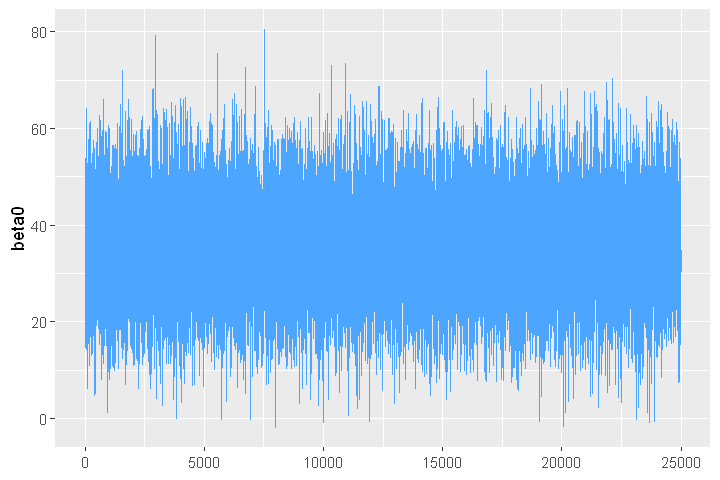

In [76]:
options(repr.plot.width=6,repr.plot.height=4)
mcmc_trace(Hitters.sample.03, pars=vars("beta0"))

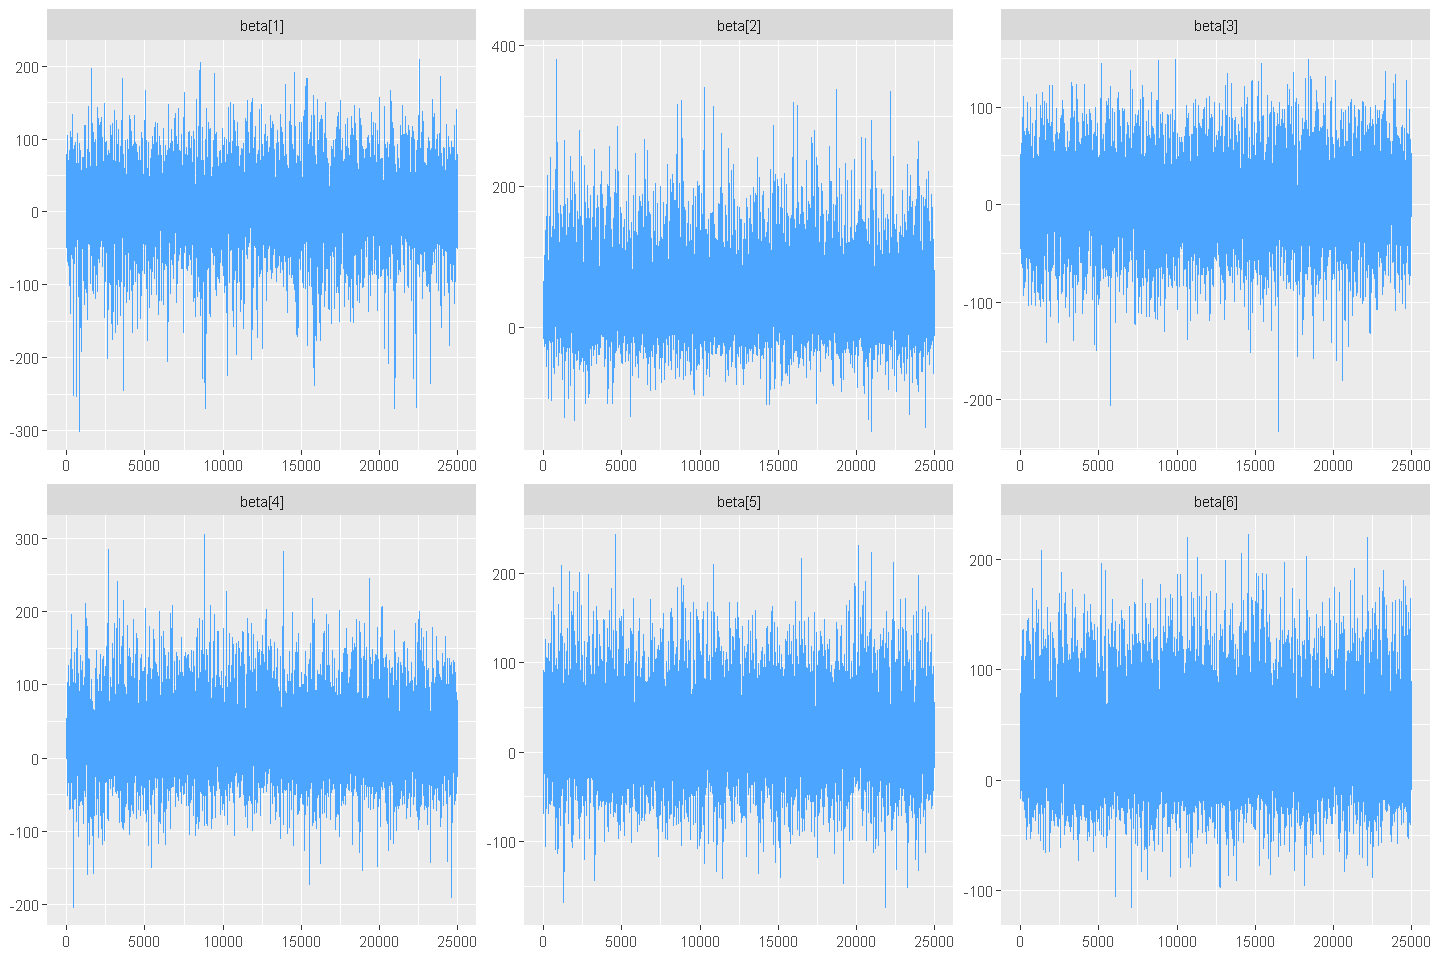

In [77]:
options(repr.plot.width=12,repr.plot.height=8)
mcmc_trace(Hitters.sample.03, pars=vars(param_range("beta", 1:6)))

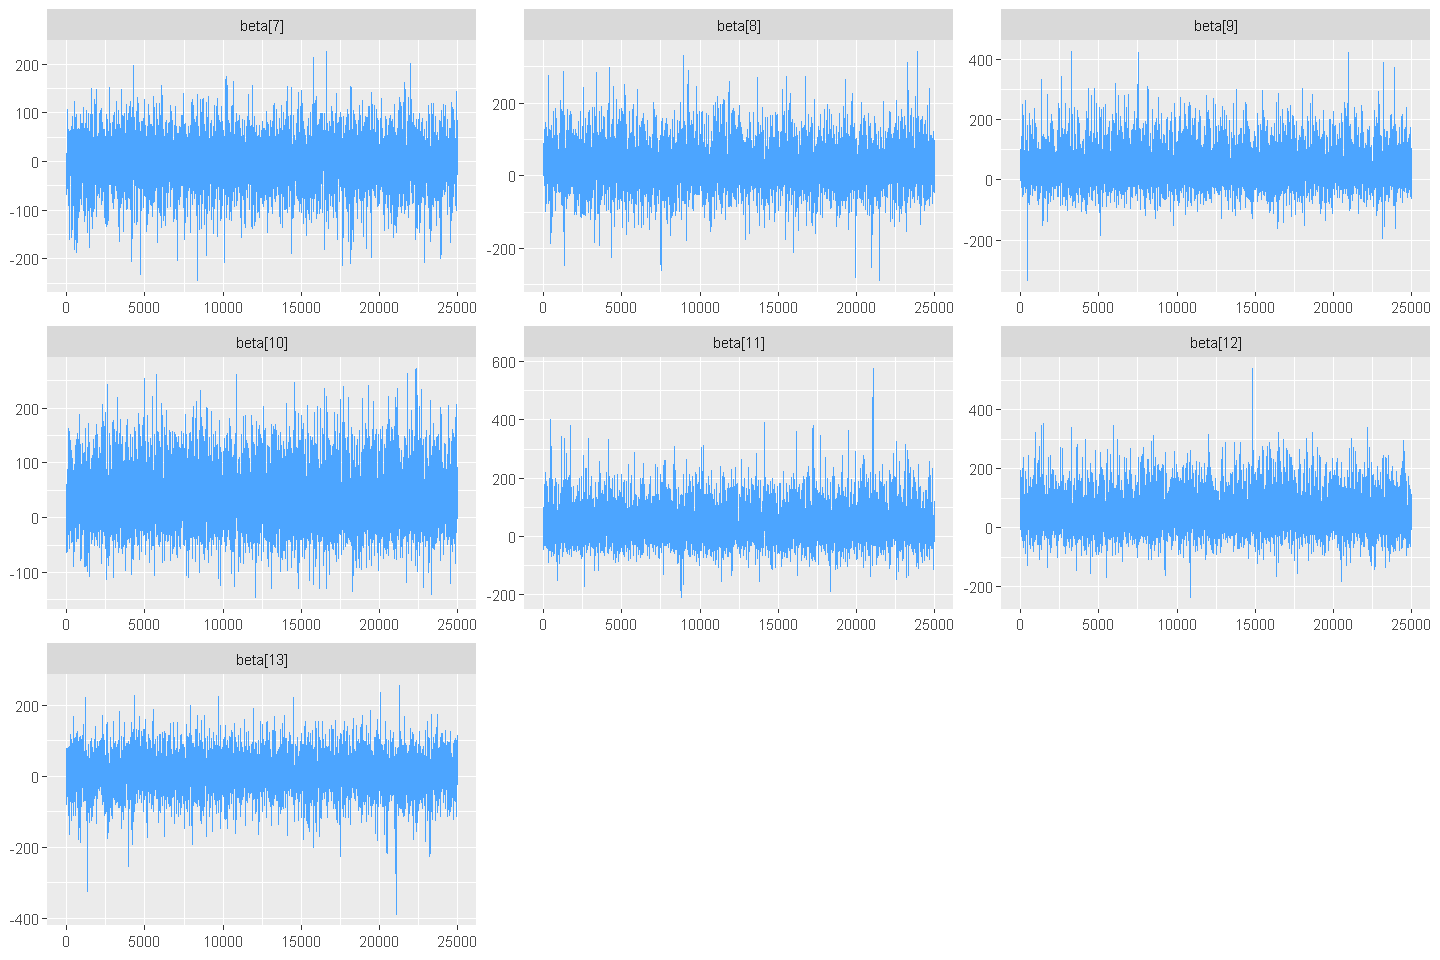

In [78]:
options(repr.plot.width=12,repr.plot.height=8)
mcmc_trace(Hitters.sample.03, pars=vars(param_range("beta", 7:13)))

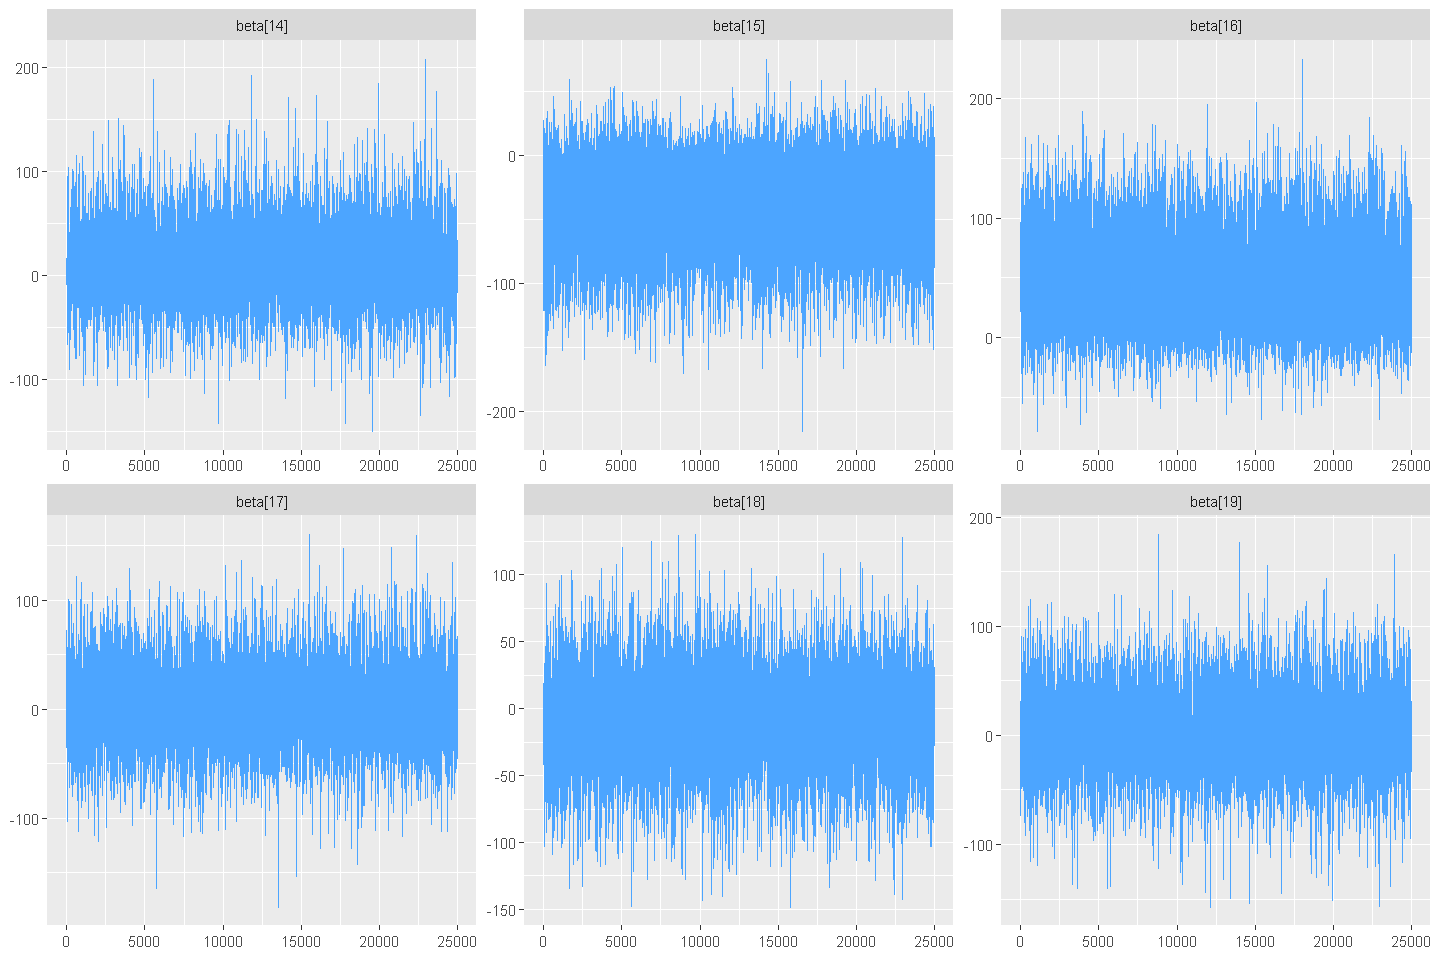

In [79]:
options(repr.plot.width=12,repr.plot.height=8)
mcmc_trace(Hitters.sample.03, pars=vars(param_range("beta", 14:19)))

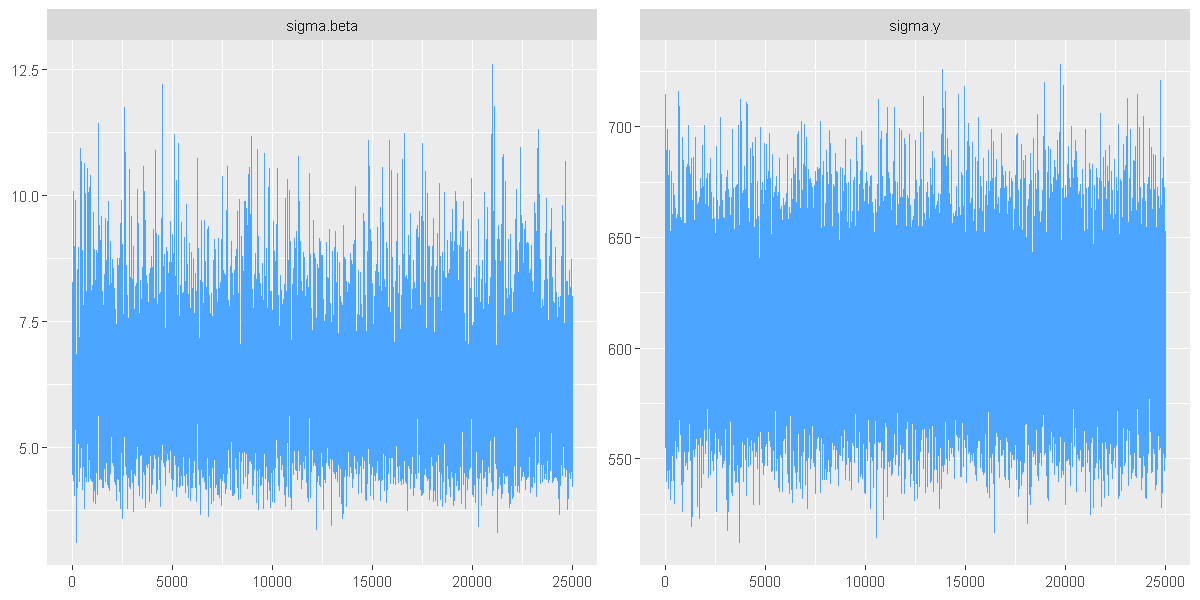

In [80]:
options(repr.plot.width=10,repr.plot.height=5)
mcmc_trace(Hitters.sample.03, pars=vars(contains("sigma")))

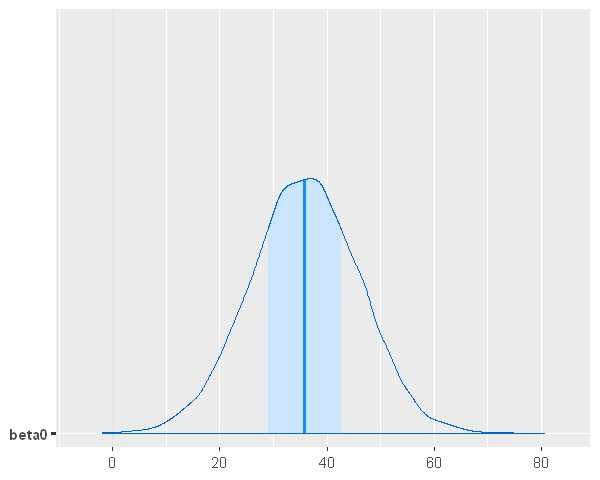

In [81]:
options(repr.plot.width=5,repr.plot.height=4)
mcmc_areas(Hitters.sample.03, pars=vars("beta0"))

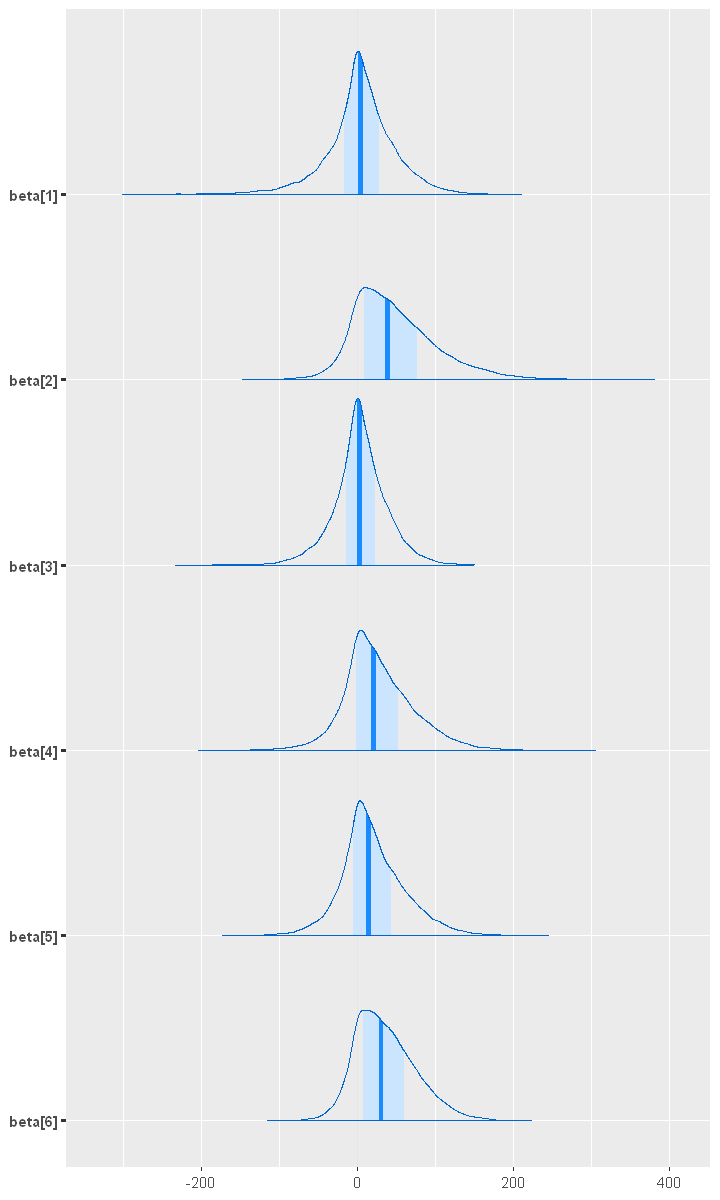

In [82]:
options(repr.plot.width=6,repr.plot.height=10)
mcmc_areas(Hitters.sample.03, pars=vars(param_range("beta", 1:6)))

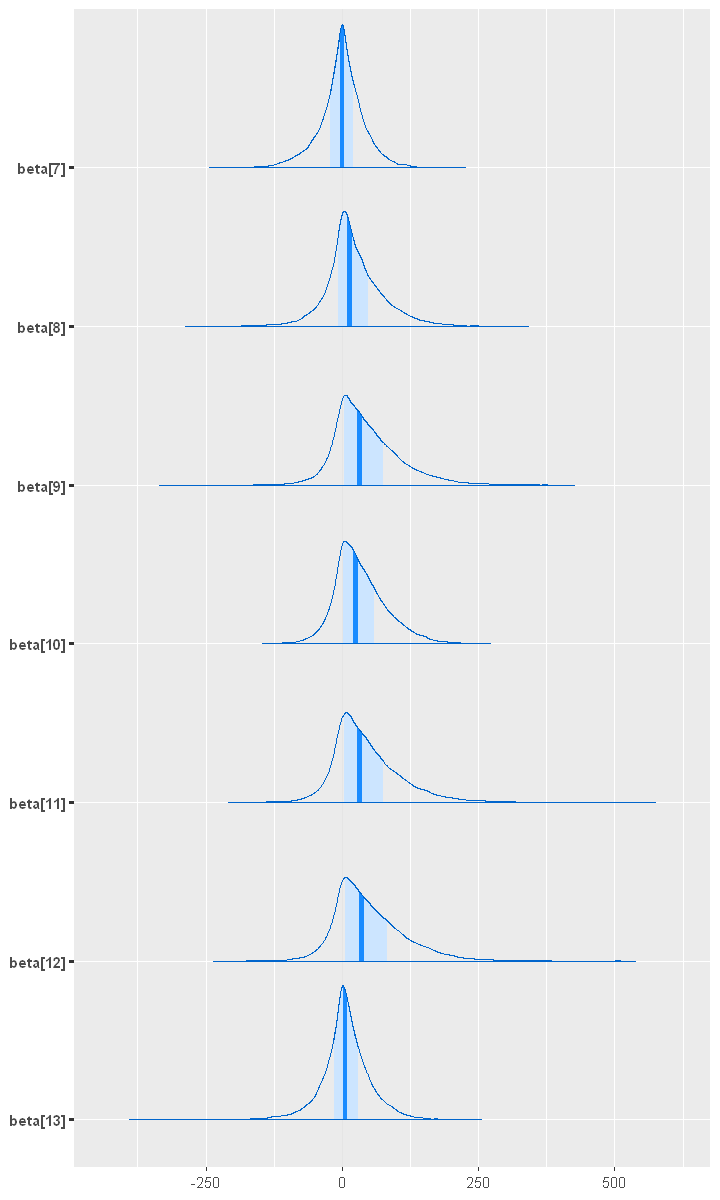

In [83]:
options(repr.plot.width=6,repr.plot.height=10)
mcmc_areas(Hitters.sample.03, pars=vars(param_range("beta", 7:13)))

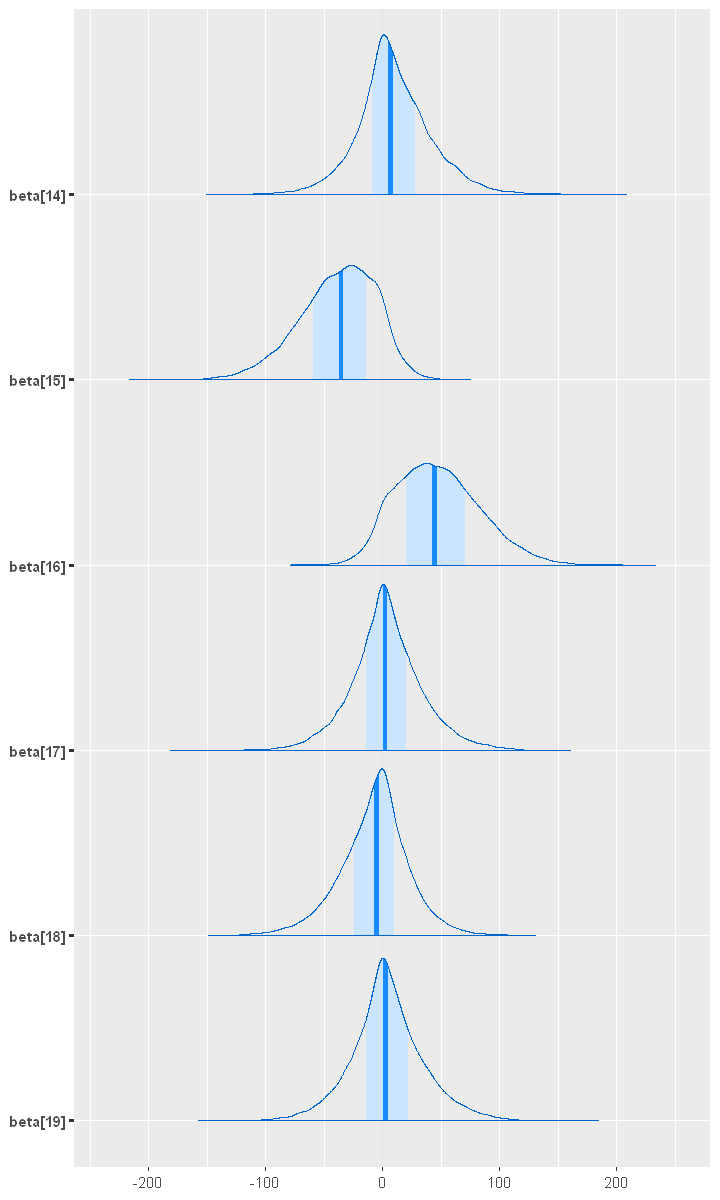

In [84]:
options(repr.plot.width=6,repr.plot.height=10)
mcmc_areas(Hitters.sample.03, pars=vars(param_range("beta", 14:19)))

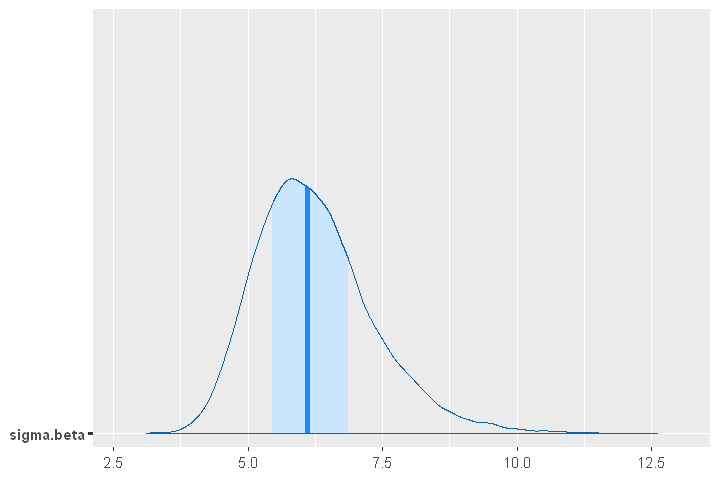

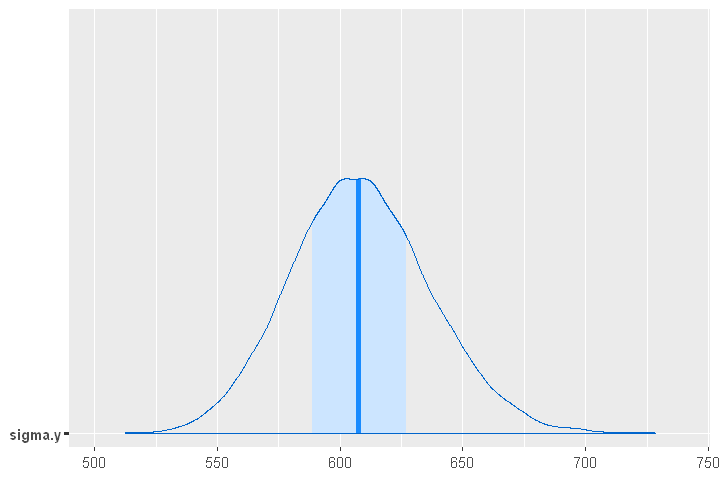

In [85]:
options(repr.plot.width=6,repr.plot.height=4)
old.par<-par(mfrow=c(1,2))
mcmc_areas(Hitters.sample.03, pars=vars("sigma.beta"))
mcmc_areas(Hitters.sample.03, pars=vars("sigma.y"))
par(old.par)

## 04. Bayesian Horseshoe Shrinkage
### A Horseshoe prior for the regression coefficients. 
### A common gamma prior for the regression coefficients' precision parameter.
### Gamma prior for the regression precision parameter

## Horseshoe distribution

The latent variable formulation of the Horsehoe is

$$
    \begin{aligned} 
    (\beta_i|\lambda_i, \tau) \sim N(0, \lambda_i^2\tau^2)\\[0.2cm]
     \lambda_i \sim \halfcauchydist(0, 1)\\[0.2cm]
     \tau \sim \halfcauchydist(0, 1)\\[0.2cm]
    \end{aligned}
$$

where $\halfcauchydist(0, 1)$ is the half-Cauchy distribution (A Cauchy truncated at zero). 

### Model:

$\beta_{0}$ is the intercept, $\beta=(\beta_{1},\dots,\beta_{p})$ is the vector of regression coefficients,   
$\tau_{y}=1/\sigma_{y}^{2}$ is the regression response precision parameter,   
$\tau_{\beta}=1/\sigma_{\beta}^{2}$ is the common precision parameter for the regression coefficients.

$$
    \begin{array}{lclcll}
        y_{i}           &\sim    &\normaldist(\mu_{i},\sigma_{y}^{2}),&&&1\leq i\leq n,\\[0.2cm]
        \mu_{i}         &=       &\beta_{0}+\sum_{j=1}^{p}x_{ij}\cdot \beta_{j}\mskip-30mu
                                      &=&\beta_{0}+x_{i\,\cdot\,}\cdot \beta,\mskip45mu  &1\leq i\leq n,\\[0.2cm]
        \beta_{0}        &\sim   &\normaldist(0,1.0E01),\\[0.2cm]
        \beta_{j}        &\sim   &\normaldist(0,\psi_{\beta,j}), &&1\leq j\leq p,\\[0.2cm]
        \psi_{\beta,j}   &=      &1/\sigma_{\beta,j}^{2},        &&1\leq j\leq p,  &\text{(Precision parameter for } \beta_{j})\\[0.2cm]              
        \sigma_{\beta,j} &=      &\lambda_{j}\cdot\tau,          &&1\leq j\leq p,\\[0.2cm]
        \lambda_{j}      &\sim   &\halfcauchydist(0, 1),         &&1\leq j\leq p,\\[0.2cm]
        \tau             &\sim   &\halfcauchydist(0, 1)\\[0.2cm] 
        \tau_{y}         &=      &1/\sigma_{y}^{2},\\[0.2cm]
        \tau_{y}         &\sim   &\gammadist(0.01,0.01).
    \end{array}
$$

In [86]:
Hitters.model.String.04 <- "model{
# Likelihood
    for(i in 1:n){
        y[i] ~ dnorm(mu[i], tau.y)
        mu[i] <- beta0 + inprod(x[i,],beta[]) 
        }
# A gaussian prior with a small precision for the intercept beta0 and the vector beta of regression coefficients
    beta0 ~ dnorm(0, 0.01)
    for(j in 1:p){
        beta[j] ~ dnorm(0,psi.beta[j])
        }

# Priors for the precision parameters 
    sigma.y <- 1.0/sqrt(tau.y)
    for(j in 1:p){
        psi.beta[j] <- pow(sigma.beta[j],-2)
        sigma.beta[j] <- lambda[j] * tau
        lambda[j]  ~ dt(0,1,1) T(0, )             # Notation for a Student's t with 1 degree of freedom truncated at zero = Half-Cauchy
        }
    tau    ~ dt(0,1,1) T(0, )
    tau.y  ~ dgamma(0.01, 0.01)
}" 

In [87]:
Hitters.data.list.04<-list(y = y, n = n, p = p, x = x0)

## Compile the model in JAGS

In [89]:
Hitters.model.04<-jags.model(textConnection(Hitters.model.String.04),data=Hitters.data.list.04)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 263
   Unobserved stochastic nodes: 41
   Total graph size: 6138

Initializing model



In [90]:
update(Hitters.model.04, 8000, progress.bar = "gui")

In [91]:
Hitters.sample.04<-coda.samples(Hitters.model.04, variable.names = c("beta0", "beta", "sigma.y", "sigma.beta"), 
                 n.iter = 30000, progress.bar = "gui") 

In [92]:
summary(Hitters.sample.04)


Iterations = 9001:39000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 30000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

                   Mean     SD Naive SE Time-series SE
beta[1]          5.2216  44.08  0.25449        1.57891
beta[2]         55.1489  70.31  0.40591        3.08187
beta[3]          3.1015  20.12  0.11614        0.27554
beta[4]         23.7451  46.18  0.26663        1.83995
beta[5]         11.0968  31.80  0.18357        1.01249
beta[6]         23.1596  38.93  0.22478        1.57475
beta[7]         -1.8235  27.87  0.16091        0.57495
beta[8]         16.0231  58.43  0.33736        3.17447
beta[9]         33.3036  73.19  0.42257        3.56574
beta[10]        15.1655  42.32  0.24431        1.79542
beta[11]        52.5226  87.46  0.50496        5.80369
beta[12]        87.3093 103.08  0.59512        5.76293
beta[13]         5.5697  36.12  0.20857        1.23459
beta[14]         3.6055  17.55 

In [93]:
#plot(Hitters.sample.04) 

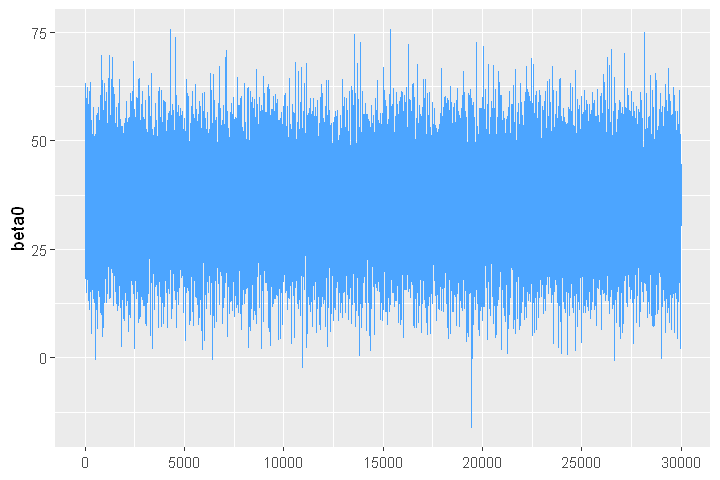

In [94]:
options(repr.plot.width=6,repr.plot.height=4)
mcmc_trace(Hitters.sample.04, pars=vars("beta0"))

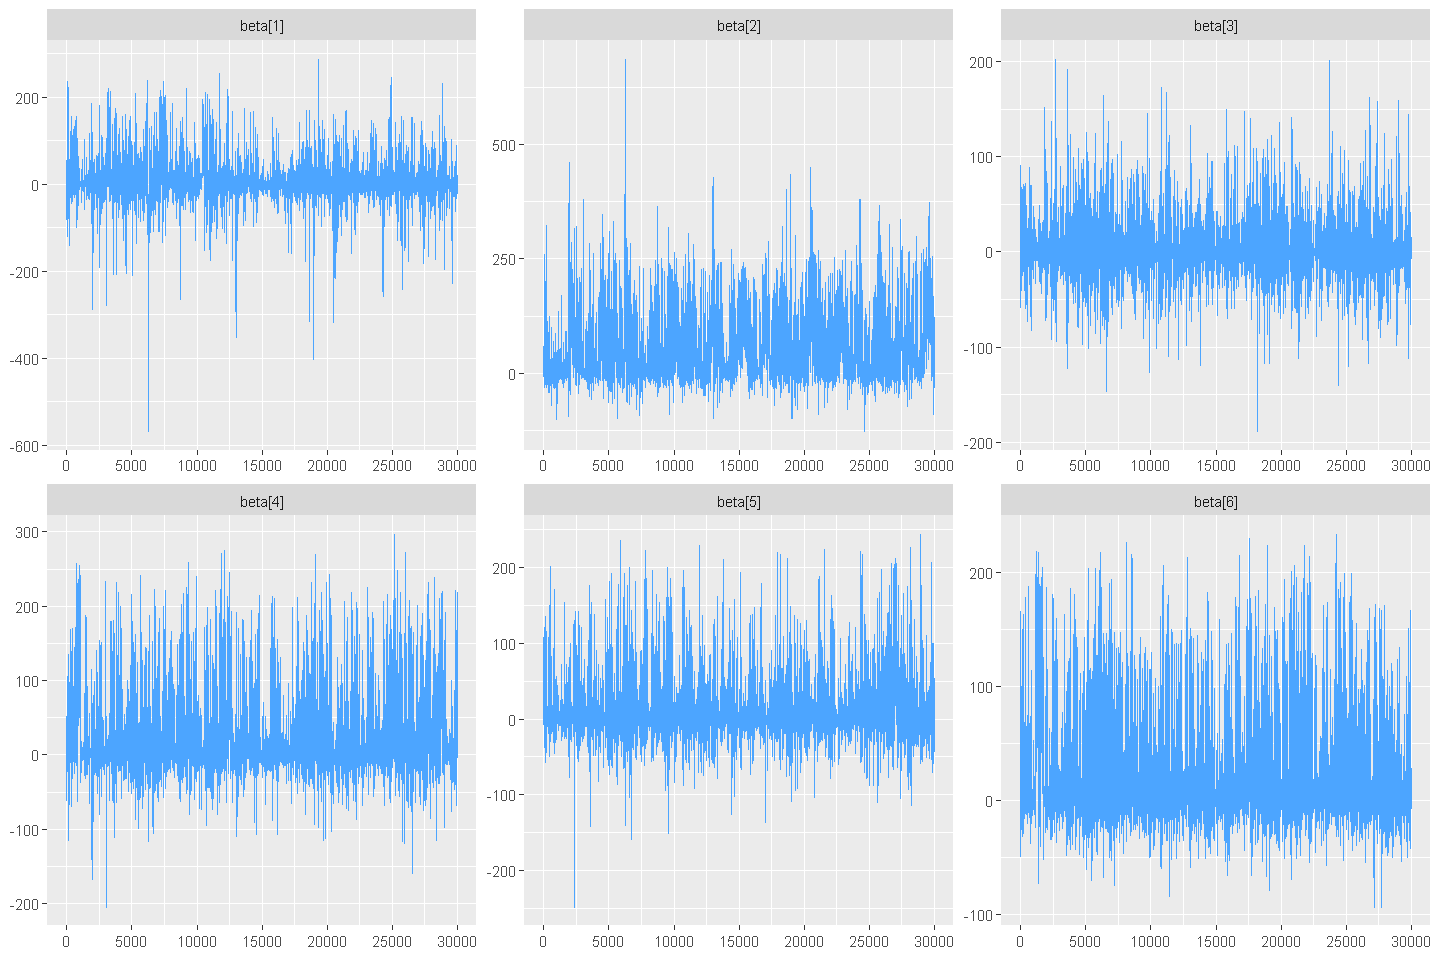

In [95]:
options(repr.plot.width=12,repr.plot.height=8)
mcmc_trace(Hitters.sample.04, pars=vars(param_range("beta", 1:6)))

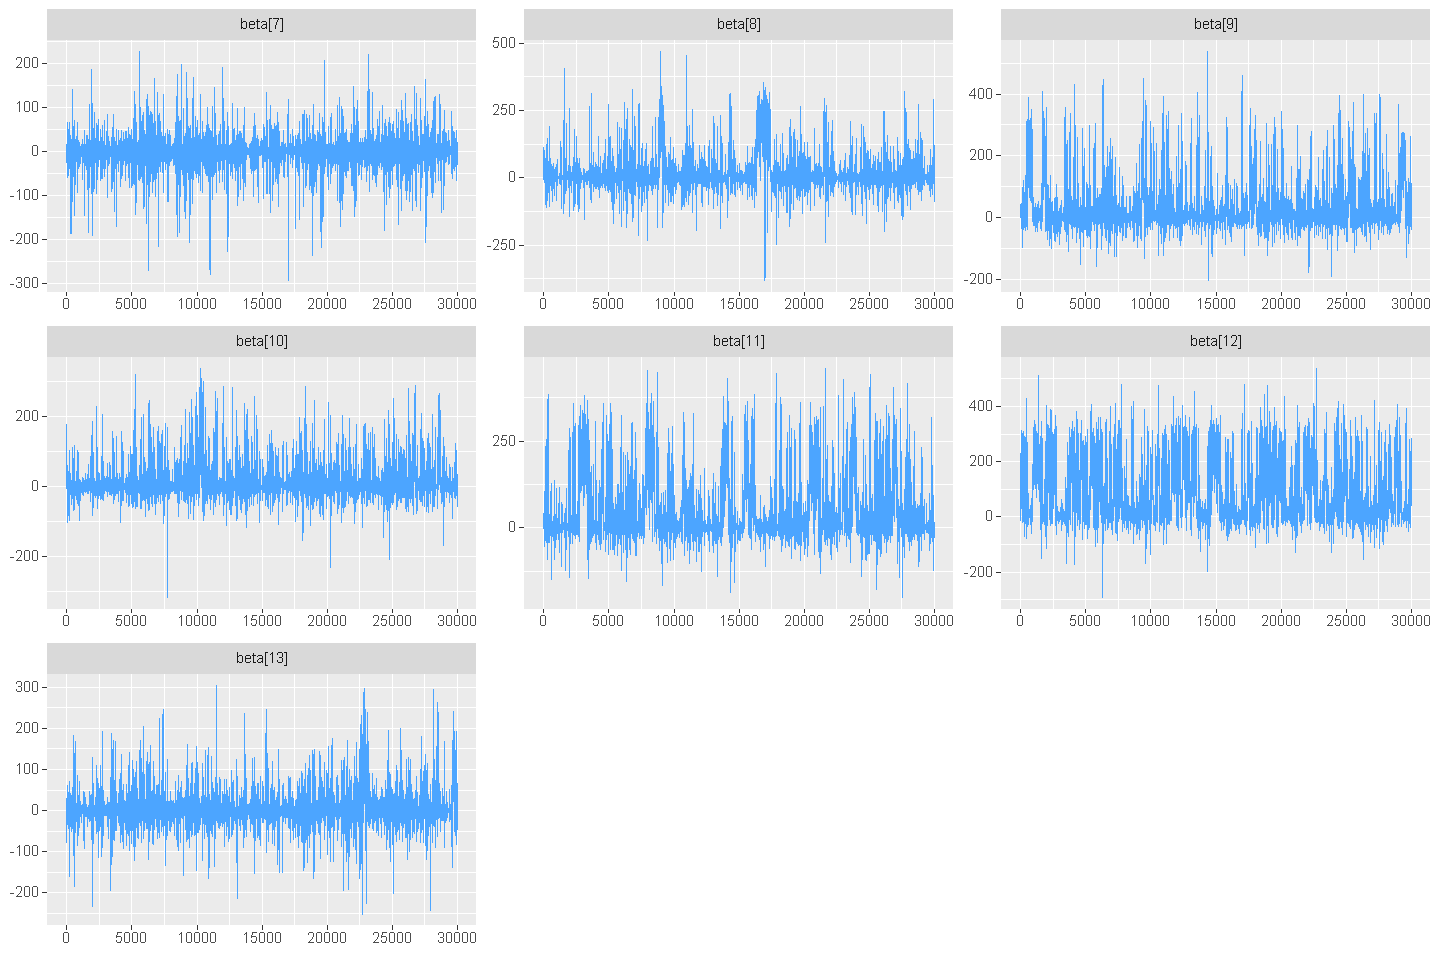

In [96]:
options(repr.plot.width=12,repr.plot.height=8)
mcmc_trace(Hitters.sample.04, pars=vars(param_range("beta", 7:13)))

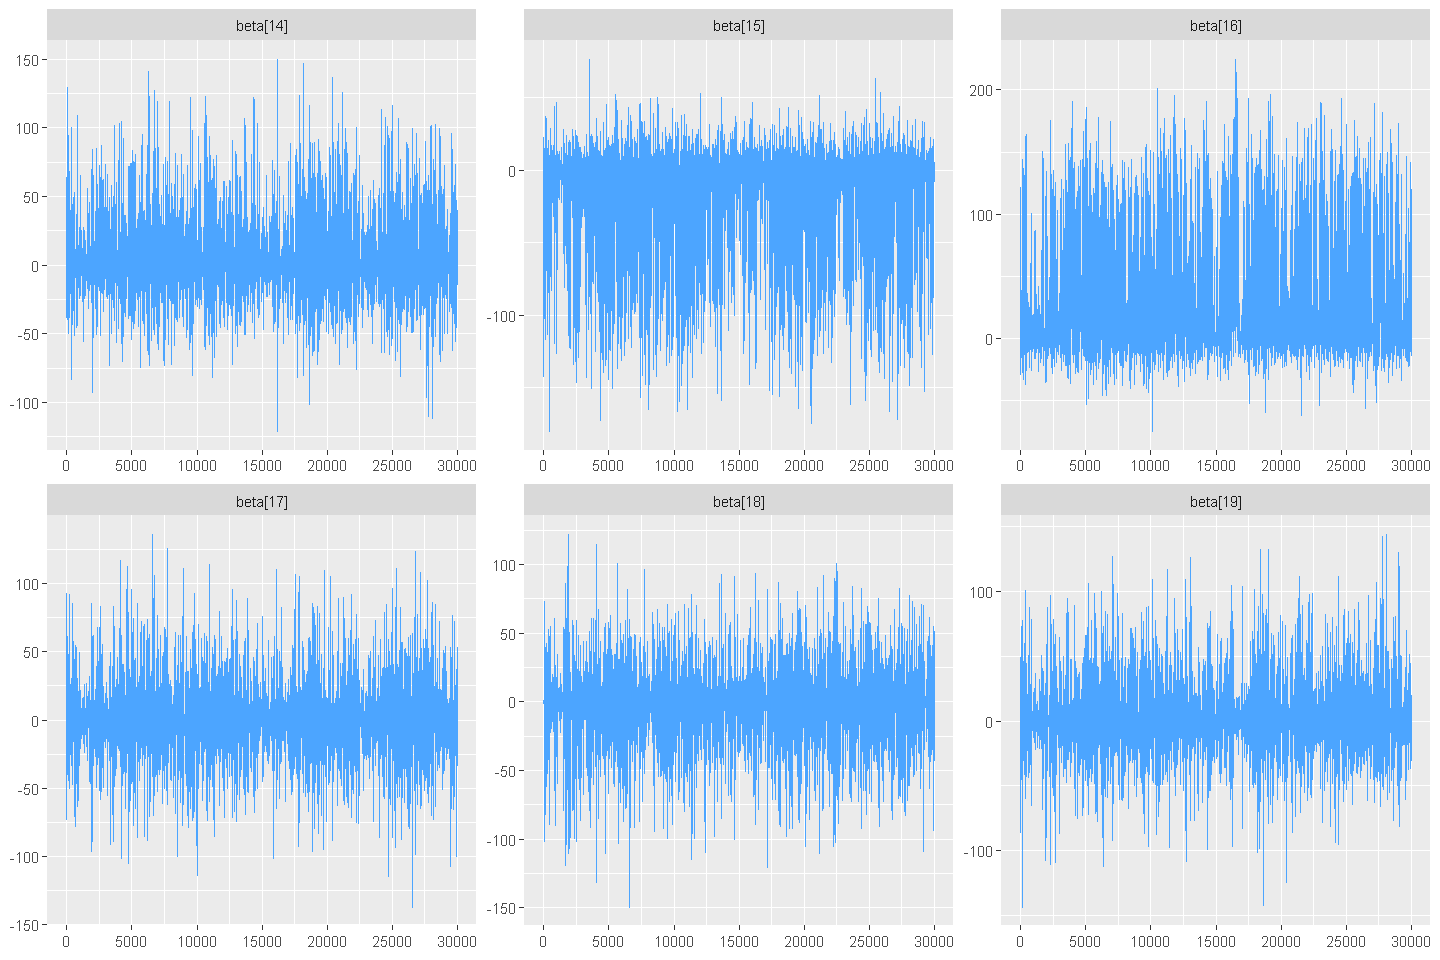

In [97]:
options(repr.plot.width=12,repr.plot.height=8)
mcmc_trace(Hitters.sample.04, pars=vars(param_range("beta", 14:19)))

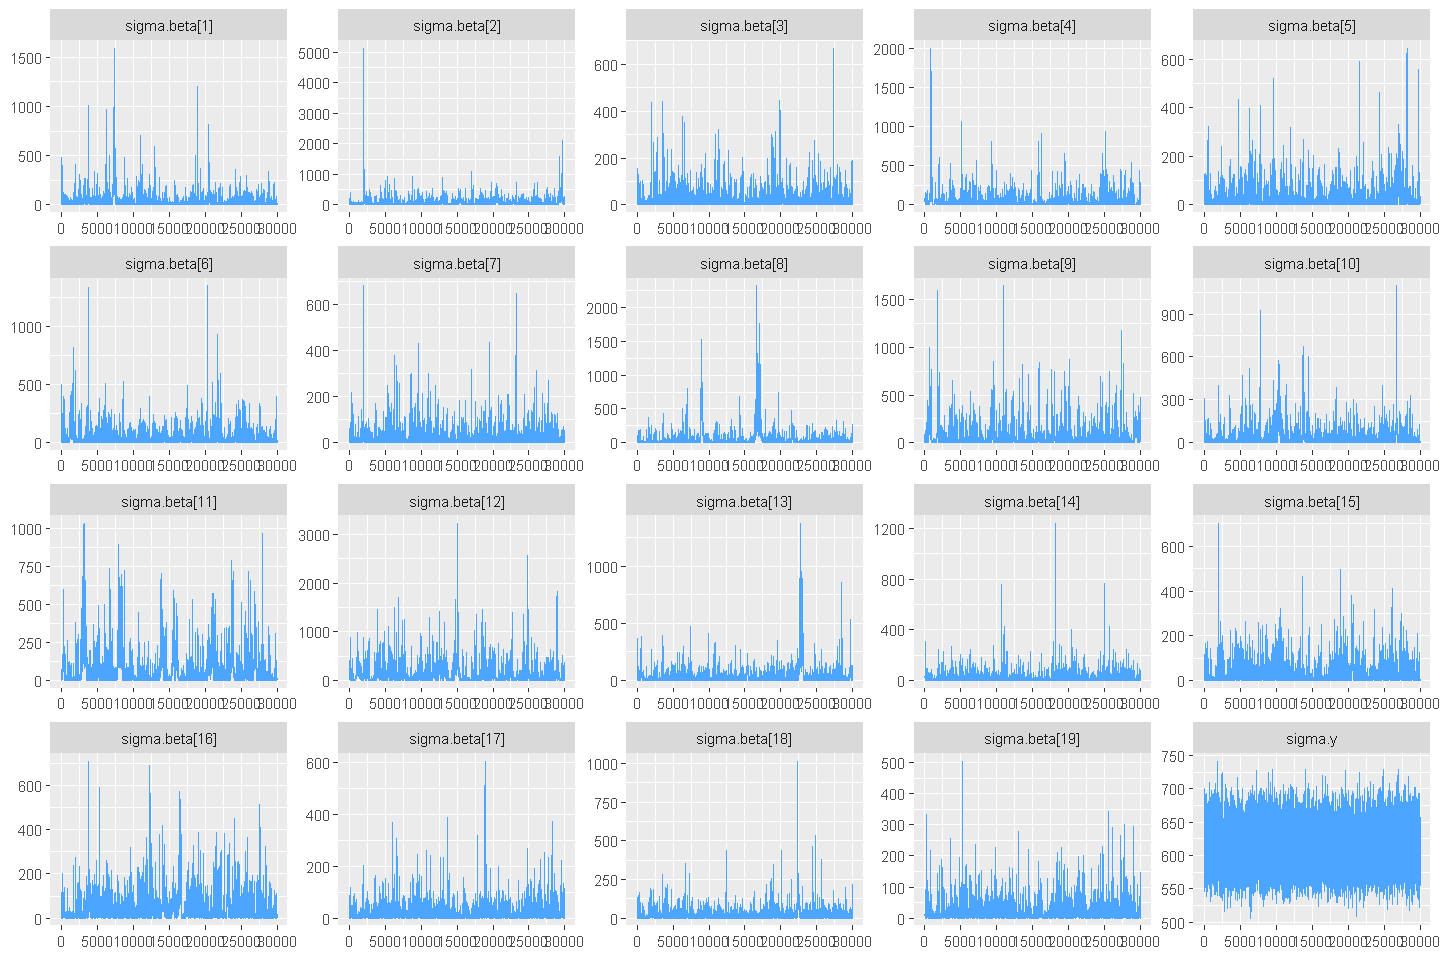

In [98]:
options(repr.plot.width=12,repr.plot.height=8)
mcmc_trace(Hitters.sample.04, pars=vars(contains("sigma")))

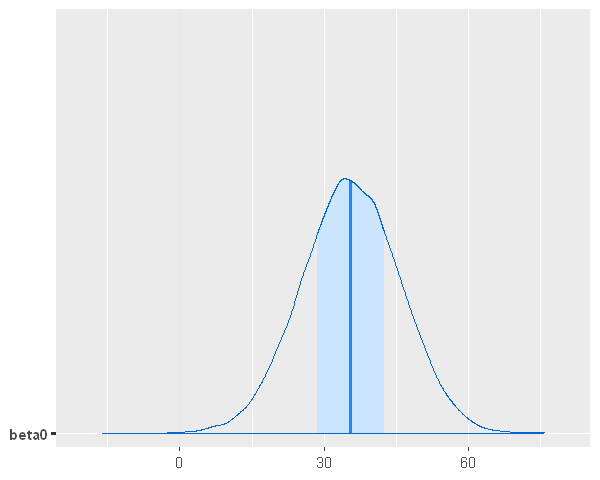

In [99]:
options(repr.plot.width=5,repr.plot.height=4)
mcmc_areas(Hitters.sample.04,pars=vars("beta0"))

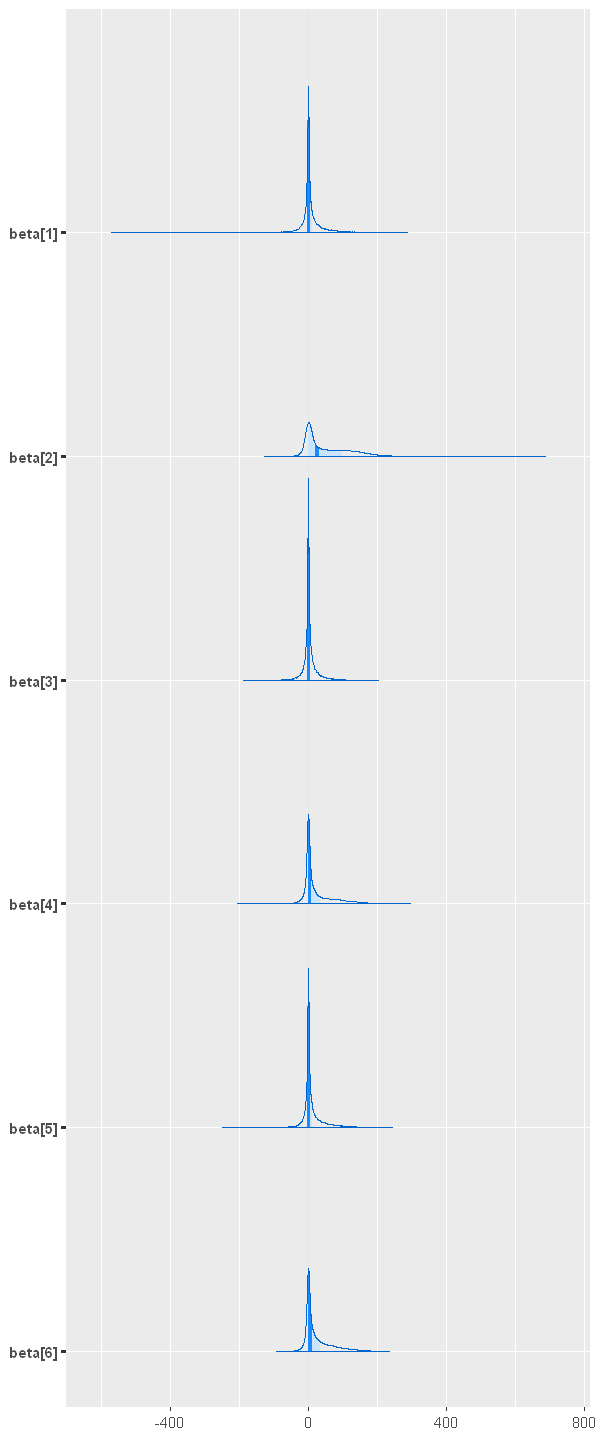

In [100]:
options(repr.plot.width=5,repr.plot.height=12)
mcmc_areas(Hitters.sample.04, pars=vars(param_range("beta", 1:6)))

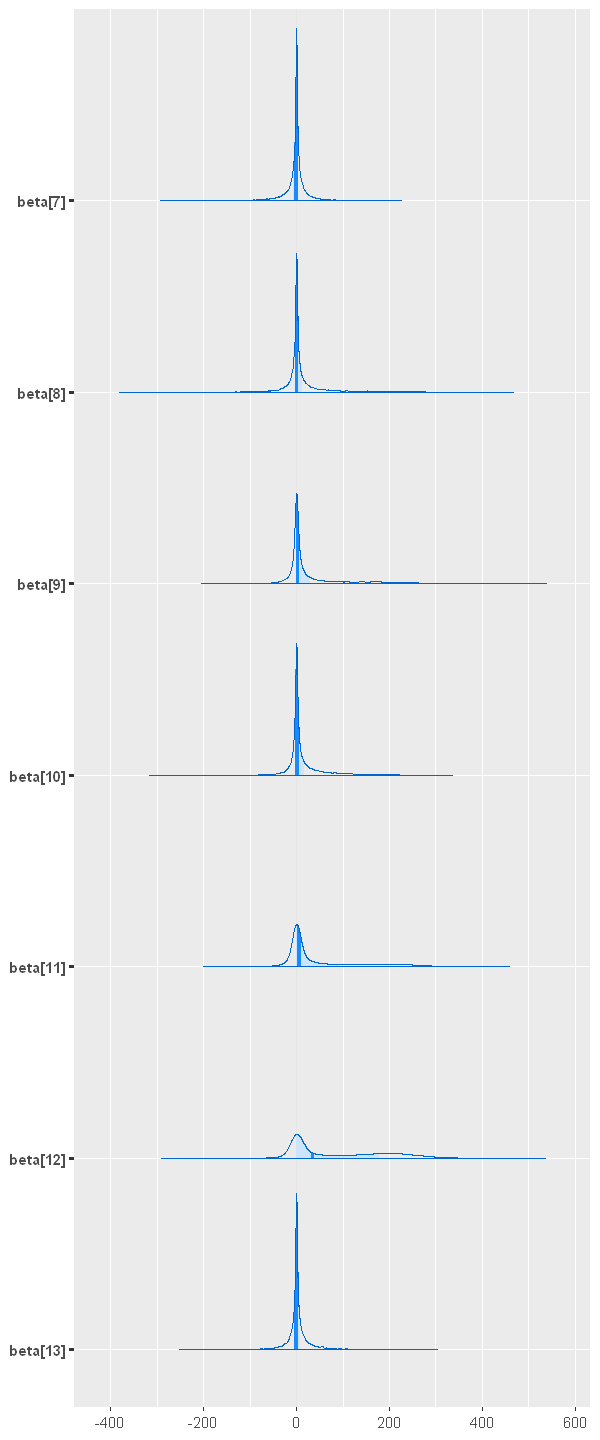

In [101]:
options(repr.plot.width=5,repr.plot.height=12)
mcmc_areas(Hitters.sample.04, pars=vars(param_range("beta", 7:13)))

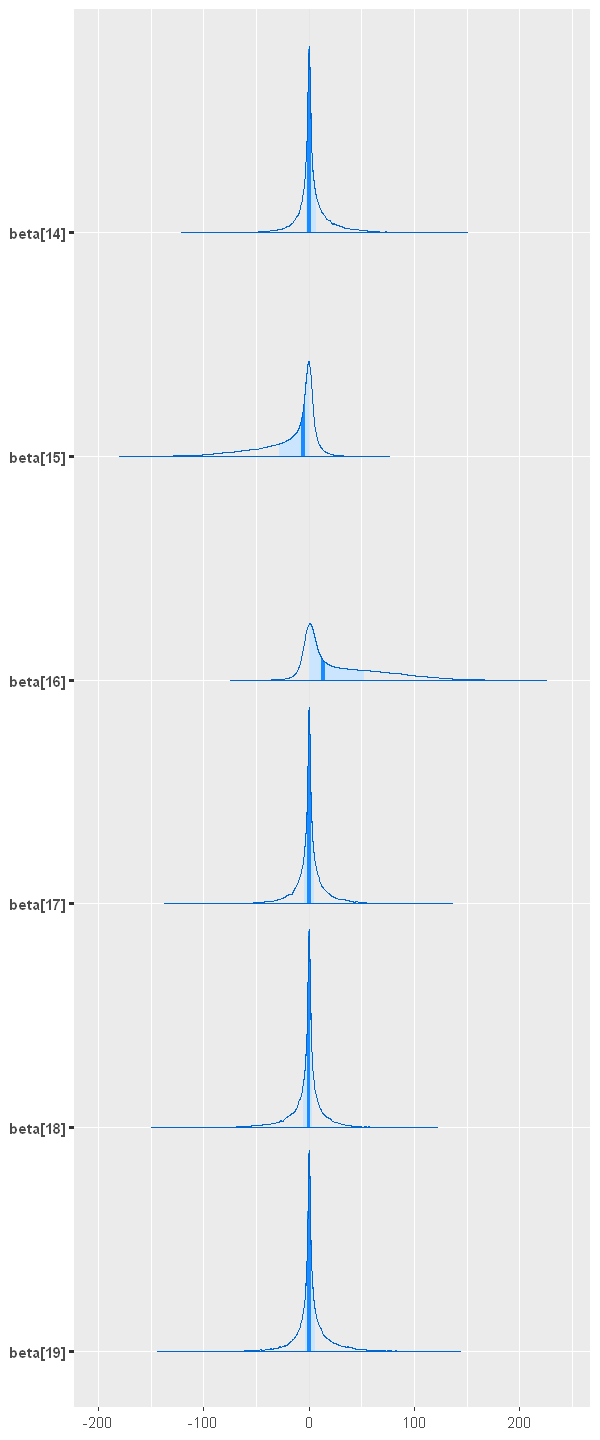

In [102]:
options(repr.plot.width=5,repr.plot.height=12)
mcmc_areas(Hitters.sample.04, pars=vars(param_range("beta", 14:19)))

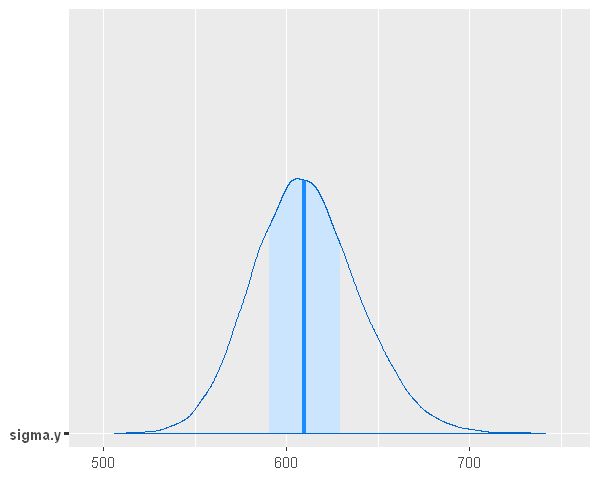

In [103]:
options(repr.plot.width=5,repr.plot.height=4)
mcmc_areas(Hitters.sample.04, pars=vars("sigma.y"))